In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\HP\Downloads\Sample - Superstore.csv.zip', encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
df.isnull()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9990,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9991,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9992,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [5]:
df.shape

(9994, 21)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
result=df.assign(Pro_Margin=df['Profit']/df['Sales']).groupby('Category').agg(
    total_sales = ('Sales' , 'sum'),
    total_profit = ('Profit' , 'sum'),                
    Avg_margin = ('Pro_Margin' , 'mean')).reset_index()                  
                     
print(result)

          Category  total_sales  total_profit  Avg_margin
0        Furniture  741999.7953    18451.2728    0.038784
1  Office Supplies  719047.0320   122490.8008    0.138030
2       Technology  836154.0330   145454.9481    0.156138


In [ ]:
res=df.assign(Pro_mar=lambda x:x['Profit']/x['Sales']).groupby('Category').agg(
     total_sales = ('Sales' , 'sum'),
    total_profit = ('Profit' , 'sum'),                
    Avg_margin = ('Pro_mar' , 'mean')).reset_index()                  
                     
print(res)

          Category  total_sales  total_profit  Avg_margin
0        Furniture  741999.7953    18451.2728    0.038784
1  Office Supplies  719047.0320   122490.8008    0.138030
2       Technology  836154.0330   145454.9481    0.156138


In [121]:
loss=df.assign(loss_flag=lambda x: (x['Profit'] <0).astype(int)).groupby('Category').agg(
    total_quantity=('Quantity','sum'),
    total_profit = ('Profit' , 'sum'),
    total_loss_cat=('loss_flag','sum')
).reset_index()
print(loss)

          Category  total_quantity  total_profit  total_loss_cat
0        Furniture            8028    18451.2728             714
1  Office Supplies           22906   122490.8008             886
2       Technology            6939   145454.9481             271


In [126]:
res=(df.groupby('Region').agg(
    total_sales=('Sales','sum'),
    total_profit=('Profit','sum'),
    max_discount=('Discount','max'),
    avg_discount=('Discount','mean')
).reset_index())

print(res)

    Region  total_sales  total_profit  max_discount  avg_discount
0  Central  501239.8908    39706.3625           0.8      0.240353
1     East  678781.2400    91522.7800           0.7      0.145365
2    South  391721.9050    46749.4303           0.7      0.147253
3     West  725457.8245   108418.4489           0.7      0.109335


In [138]:
dis=df.assign(Discount_level=lambda x: x['Discount'].apply(
    lambda d: 'High' if d>0.3 else 'Medium' if 0.1<d<0.3 else 'Low')).groupby('Discount_level').size().reset_index(name='Order Count')

print(dis)

  Discount_level  Order Count
0           High         1166
1            Low         5119
2         Medium         3709


In [149]:
top3=df.groupby('Sub-Category').agg(Net_Profit=('Profit','sum')).reset_index().sort_values(by='Net_Profit',ascending=False).head(3)
print(top3)

   Sub-Category  Net_Profit
6       Copiers  55617.8249
13       Phones  44515.7306
0   Accessories  41936.6357


In [ ]:
pro=df.groupby('Sub-Category').agg(
    total_sales=('Sales','sum'),
    total_profit=('Profit','sum')).assign(Profit_ratio=lambda x:x['total_profit']/x['total_sales']).reset_index()

print(pro)

   Sub-Category  total_sales  total_profit  Profit_ratio
0   Accessories  167380.3180    41936.6357      0.250547
1    Appliances  107532.1610    18138.0054      0.168675
2           Art   27118.7920     6527.7870      0.240711
3       Binders  203412.7330    30221.7633      0.148574
4     Bookcases  114879.9963    -3472.5560     -0.030228
5        Chairs  328449.1030    26590.1663      0.080957
6       Copiers  149528.0300    55617.8249      0.371956
7     Envelopes   16476.4020     6964.1767      0.422676
8     Fasteners    3024.2800      949.5182      0.313965
9   Furnishings   91705.1640    13059.1436      0.142404
10       Labels   12486.3120     5546.2540      0.444187
11     Machines  189238.6310     3384.7569      0.017886
12        Paper   78479.2060    34053.5693      0.433918
13       Phones  330007.0540    44515.7306      0.134893
14      Storage  223843.6080    21278.8264      0.095061
15     Supplies   46673.5380    -1189.0995     -0.025477
16       Tables  206965.5320   

In [159]:
pivot=pd.pivot_table(df,index='Category',columns='Region',values=['Sales','Profit'],aggfunc={'Sales':'sum','Profit':'mean'})
print(pivot)

                    Profit                                         Sales  \
Region             Central       East      South       West      Central   
Category                                                                   
Furniture        -5.968918   5.068496  20.395199  16.272914  163797.1638   
Office Supplies   6.244712  23.957114  20.086827  27.733183  167026.4150   
Technology       80.231981  88.714084  68.231506  73.962687  170416.3120   

                                                      
Region                 East       South         West  
Category                                              
Furniture        208291.204  117298.684  252612.7435  
Office Supplies  205516.055  125651.313  220853.2490  
Technology       264973.981  148771.908  251991.8320  


In [179]:
res=(df.dropna().assign(Pro_Margin=lambda x: x['Profit']/x['Sales']).query('Pro_Margin>0').groupby('Sub-Category').agg(
    Total_Sales=('Sales','sum'),
    Profit_Margin=('Pro_Margin','mean')
)).reset_index()
print(res)

   Sub-Category  Total_Sales  Profit_Margin
0   Accessories   38026.5360       0.194399
1    Appliances   26083.4370       0.131163
2           Art    9104.1520       0.147315
3       Binders   85442.6400       0.343281
4     Bookcases   34430.9635       0.072614
5        Chairs  129809.4110       0.104573
6       Copiers   73078.8500       0.261504
7     Envelopes    5869.9520       0.346446
8     Fasteners    1052.1600       0.296266
9   Furnishings   15446.7440       0.202619
10       Labels    3246.7520       0.342700
11     Machines   45748.3780       0.183522
12        Paper   25321.3360       0.343689
13       Phones  170329.5040       0.121050
14      Storage   27527.2080       0.084821
15     Supplies    1047.1520       0.102500
16       Tables   29404.5730       0.048427


In [ ]:
total_sales=df['Sales'].sum()
res=df.groupby('Category').agg(
    Total_orders=('Order ID','count'),
    Total_sales=('Sales','sum')).assign(Percent_contribution=lambda x:(x['Total_sales']/total_sales)*100).reset_index()

print(res)

          Category  Total_orders  Total_sales  Percent_contribution
0        Furniture          2121  741999.7953             32.300171
1  Office Supplies          6026  719047.0320             31.301008
2       Technology          1847  836154.0330             36.398821


In [189]:
avg_sales=df['Sales'].mean()
avg_profit=df['Profit'].mean()
res=df.groupby('Sub-Category').agg(
    average_sales=('Sales','mean'),
    average_profit=('Profit','mean'))
ovr=res[
    (res['average_sales']>avg_sales)&
    (res['average_profit']<avg_profit)
].reset_index()
print(ovr)
#output says empty data set means no such values exist
#each category ka average is greater than total category ka average 

  Sub-Category  average_sales  average_profit
0    Bookcases     503.859633      -15.230509
1      Storage     264.590553       25.152277
2     Supplies     245.650200       -6.258418
3       Tables     648.794771      -55.565771


In [198]:
res=df.groupby('Region').agg(Total_profit=('Profit','sum'),Total_sales=('Sales','sum')).assign(Profit_Margin=lambda x: x['Total_profit']/x['Total_sales']).query('Profit_Margin>0').reset_index().sort_values(by='Profit_Margin',ascending=False).head(2)
print(res)

  Region  Total_profit  Total_sales  Profit_Margin
3   West   108418.4489  725457.8245       0.149448
1   East    91522.7800  678781.2400       0.134834


In [199]:
result = (
    df.assign(Margin=lambda x: x["Profit"]/x["Sales"])
      .query("Margin > 0")
      .groupby("Region")
      .agg(Total_Profit=("Profit","sum"))
      .sort_values("Total_Profit", ascending=False)
      .head(2)
      .reset_index()
)
print(result)

  Region  Total_Profit
0   East   141113.3875
1   West   131139.4098


In [187]:

res=df['Profit'].mean()
print(res)

28.65689630778467


In [65]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')

In [66]:
df['Ship Date']=pd.to_datetime(df['Order Date'],errors='coerce')

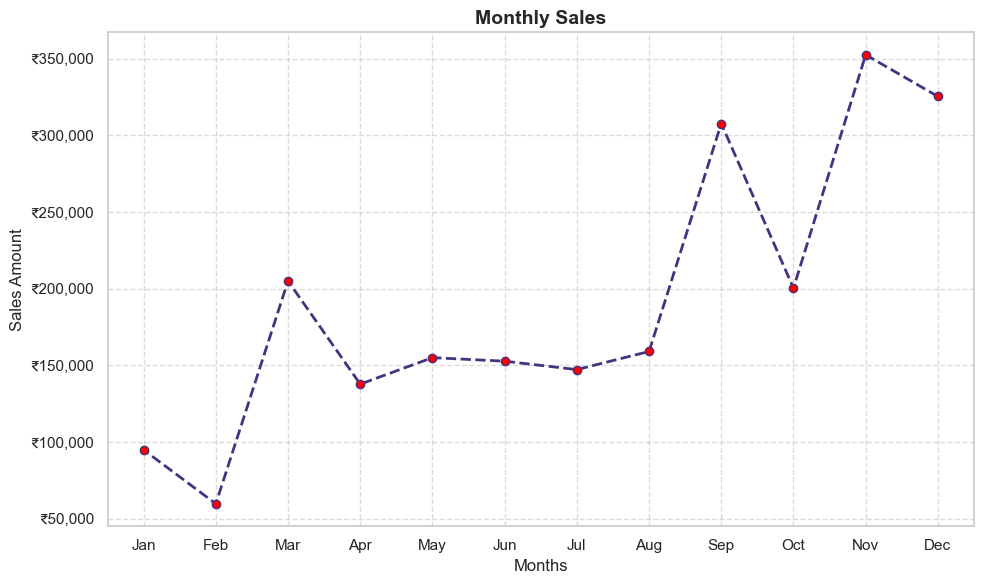

In [67]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['mon']=df['Order Date'].dt.month
mon_sales=df.groupby(['mon'])['Sales'].sum().sort_index(ascending=False)

plt.figure(figsize=(10,6))
plt.plot(mon_sales.index,mon_sales.values,marker='o',markerfacecolor='red',linestyle='--',linewidth=2)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Monthly Sales',fontweight='bold',fontsize=14)
plt.xlabel('Months',fontsize=12)
plt.ylabel('Sales Amount',fontsize=12)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)

plt.xlim(0.5, 12.5)          # nice padding
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

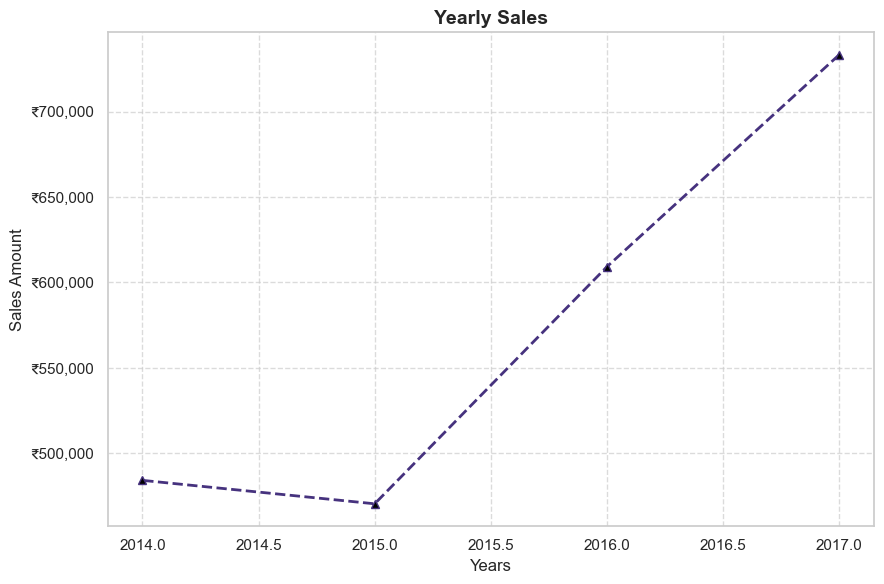

In [68]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['year']=df['Order Date'].dt.year
year_sales=df.groupby(['year'])['Sales'].sum().sort_index(ascending=False)

plt.figure(figsize=(9,6))
plt.plot(year_sales.index,year_sales.values,marker='^',markerfacecolor='black',linestyle='--',linewidth=2)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Yearly Sales',fontweight='bold',fontsize=14)
plt.xlabel('Years',fontsize=12)
plt.ylabel('Sales Amount',fontsize=12)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

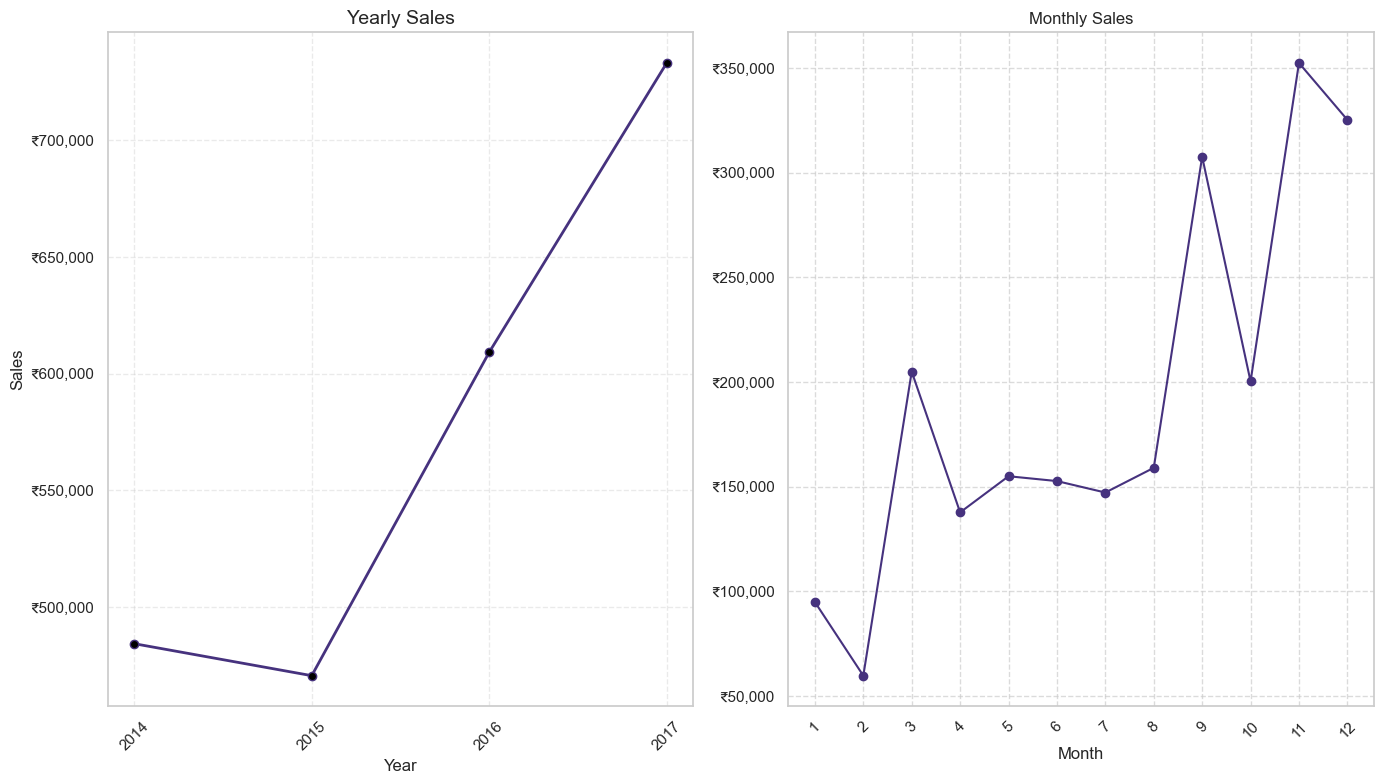

In [69]:
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['year']=df['Order Date'].dt.year
year_sales=df.groupby(['year'])['Sales'].sum().sort_index(ascending=False)

df['mon']=df['Order Date'].dt.month
mon_sales=df.groupby(['mon'])['Sales'].sum().sort_index(ascending=False)

fig, ax = plt.subplots(1, 2, figsize=(14, 8))

# Yearly sales
ax[0].plot(year_sales.index, year_sales.values, marker='o',markerfacecolor='black',linestyle='-',linewidth=2)
ax[0].set_title('Yearly Sales',fontsize=14)
ax[0].set_xlabel('Year',fontsize=12)
ax[0].set_ylabel('Sales',fontsize=12)
ax[0].set_xticks(year_sales.index)
ax[0].set_xticklabels(year_sales.index, rotation=45)
ax[0].yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
ax[0].grid(linestyle='--',alpha=0.4)

# Monthly sales
ax[1].plot(mon_sales.index, mon_sales.values, marker='o')
ax[1].set_title('Monthly Sales')
ax[1].set_xlabel('Month',fontsize=12)
ax[1].set_xticks(mon_sales.index)
ax[1].set_xticklabels(mon_sales.index, rotation=45)
ax[1].yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.tight_layout()
plt.show()


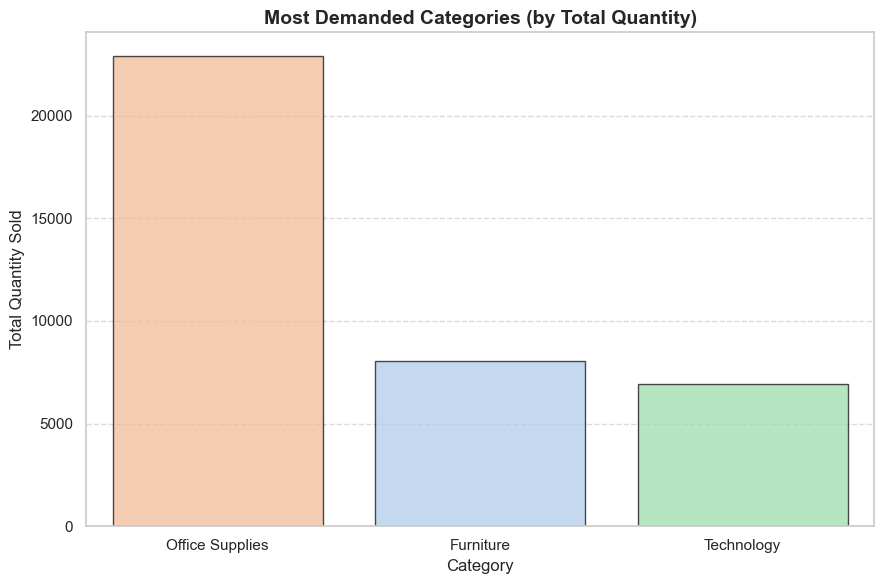

In [70]:
cat_sales = df.groupby('Category')['Quantity'].sum().reset_index()

plt.figure(figsize=(9, 6))
sns.barplot(
    x='Category',
    y='Quantity',
    data=cat_sales,
    hue='Category',
    legend=False,
    order=cat_sales.sort_values('Quantity', ascending=False)['Category'],
    palette='pastel',
    edgecolor='black',
    alpha=0.7
)
plt.title('Most Demanded Categories (by Total Quantity)', fontweight='bold', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

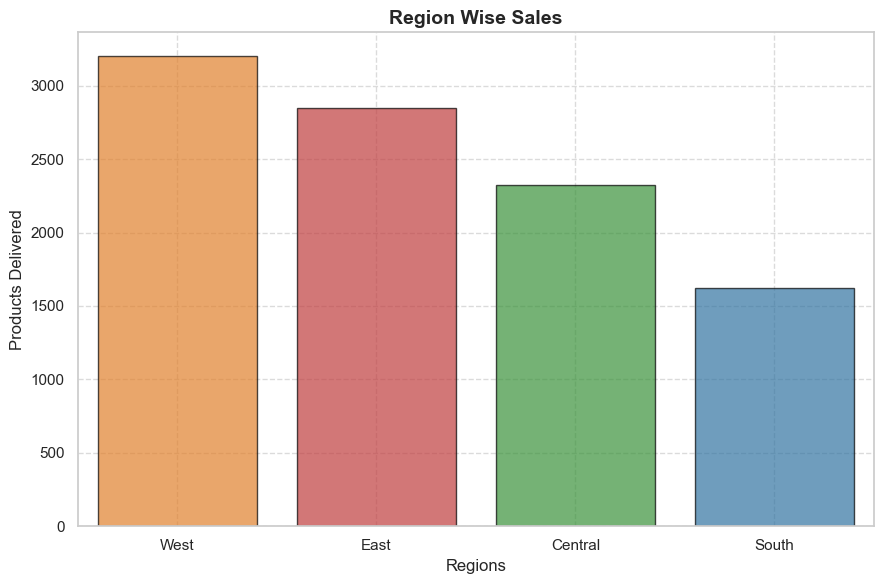

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\HP\Downloads\Sample - Superstore.csv.zip', encoding='latin1')

plt.figure(figsize=(9,6))
reg=df.groupby(['Region']) ['Quantity'].sum().reset_index()
sns.countplot(x='Region', data=df, order=reg.sort_values('Quantity',ascending=False)['Region'],palette='tab10',hue='Region',legend=False,edgecolor='black',alpha=0.7)
plt.title('Region Wise Sales',fontweight='bold',fontsize=14)
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Products Delivered',fontsize=12)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

Category  Furniture  Office Supplies  Technology
Region                                          
Central         481             1422         420
East            601             1712         535
South           332              995         293
West            707             1897         599


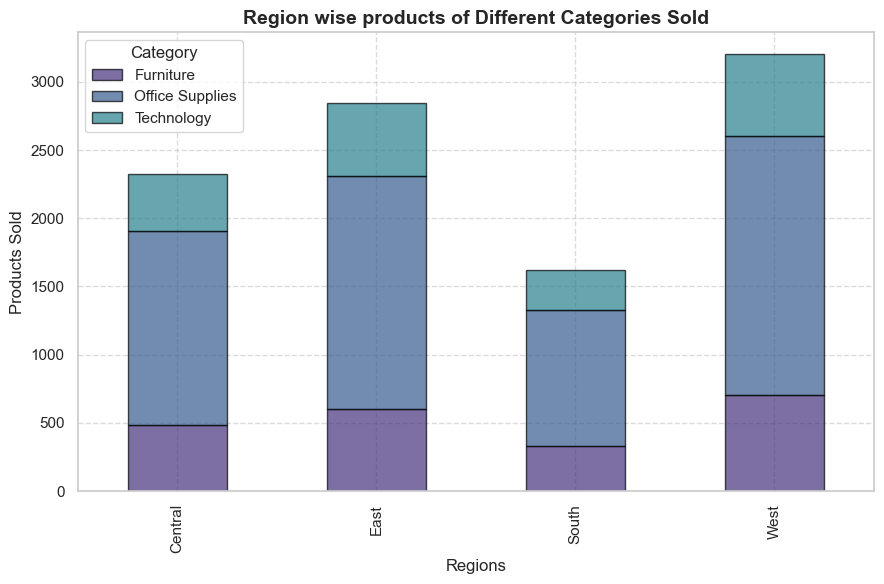

In [72]:
stack=pd.crosstab(index=df['Region'],columns=df['Category'])
print(stack)

stack.plot(kind='bar',stacked=True,edgecolor='black',alpha=0.7,figsize=(9,6))
plt.title('Region wise products of Different Categories Sold',fontweight='bold',fontsize=14)
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Products Sold',fontsize=12)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [73]:
sellers=df.groupby('Category') [['Sales','Profit']].sum().reset_index().sort_values(by=['Sales'],ascending=False)
sellers

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008


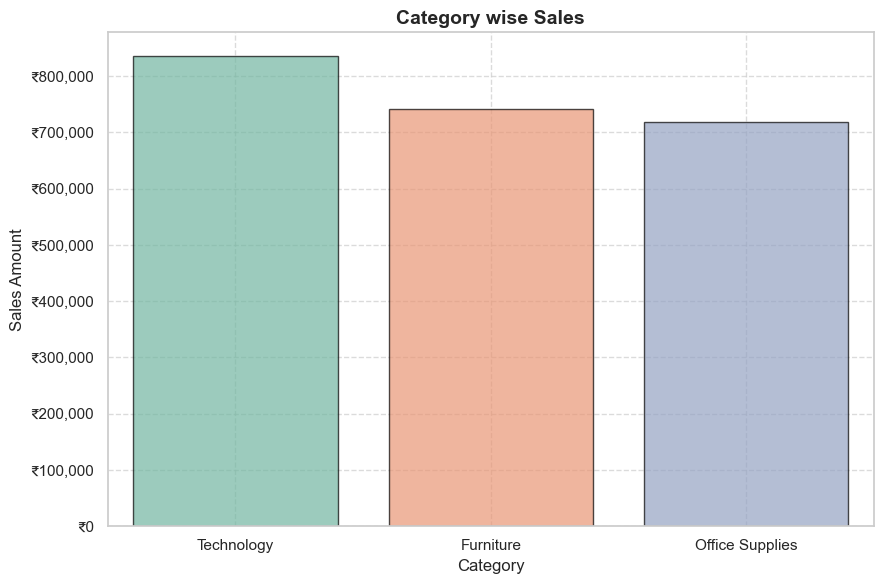

In [74]:
import matplotlib.ticker as mtick

plt.figure(figsize=(9,6))
sns.barplot(x='Category',y='Sales',data=sellers,palette='Set2',hue='Category',legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Category wise Sales',fontweight='bold',fontsize=14)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Sales Amount',fontsize=12)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
sellers=df.groupby('Category') [['Sales','Profit']].sum().reset_index().sort_values(by=['Profit'],ascending=False)
sellers

,Category,Sales,Profit
2,Technology,836154.0330,145454.9481
1,Office Supplies,719047.0320,122490.8008
0,Furniture,741999.7953,18451.2728


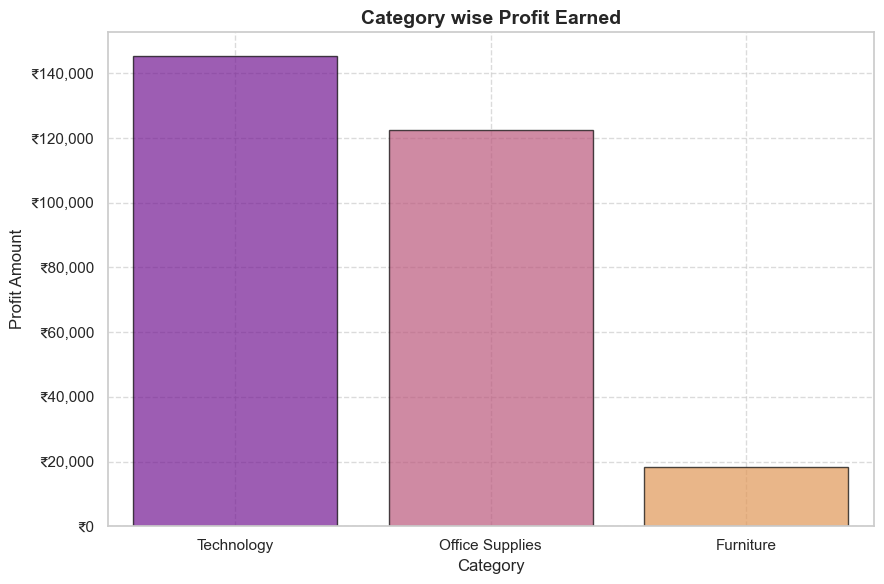

In [76]:
import matplotlib.ticker as mtick

plt.figure(figsize=(9,6))
sns.barplot(x='Category',y='Profit',data=sellers,palette='plasma',hue='Category',legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Category wise Profit Earned',fontweight='bold',fontsize=14)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Profit Amount',fontsize=12)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

In [77]:
sell=df.groupby('Sub-Category') [['Sales','Profit']].sum().reset_index()
sell

,Sub-Category,Sales,Profit
0,Accessories,167380.3180,41936.6357
1,Appliances,107532.1610,18138.0054
2,Art,27118.7920,6527.7870
3,Binders,203412.7330,30221.7633
4,Bookcases,114879.9963,-3472.5560
5,Chairs,328449.1030,26590.1663
6,Copiers,149528.0300,55617.8249
7,Envelopes,16476.4020,6964.1767
8,Fasteners,3024.2800,949.5182
9,Furnishings,91705.1640,13059.1436


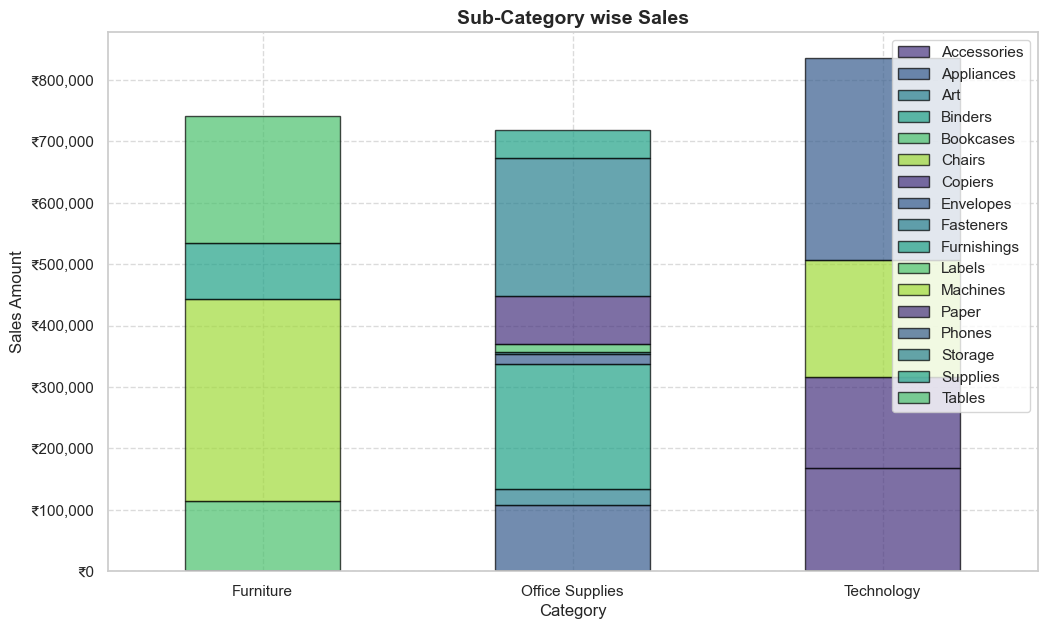

In [78]:
import matplotlib.ticker as mtick
pivot=pd.pivot_table(df,index='Category',columns='Sub-Category',values='Sales',aggfunc='sum')

pivot.plot(kind='bar',stacked=True,figsize=(12,7),legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Sub-Category wise Sales',fontweight='bold',fontsize=14)
plt.xlabel('Category',fontsize=12)
plt.ylabel('Sales Amount',fontsize=12)
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.grid(linestyle='--',alpha=0.7)
plt.show()

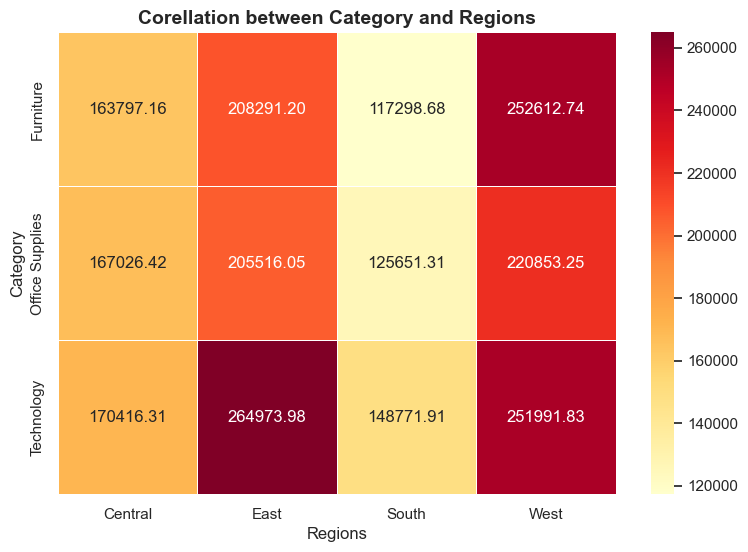

In [79]:
cat_region=pd.pivot_table(df,index='Category',columns='Region',values='Sales',aggfunc='sum')

plt.figure(figsize=(9,6))
sns.heatmap(cat_region,annot=True,fmt='.2f',cmap='YlOrRd',edgecolor='black',linewidth=0.5)
plt.title('Corellation between Category and Regions',fontweight='bold',fontsize=14)
plt.xlabel('Regions',fontsize=12)
plt.ylabel('Category',fontsize=12)
plt.show()

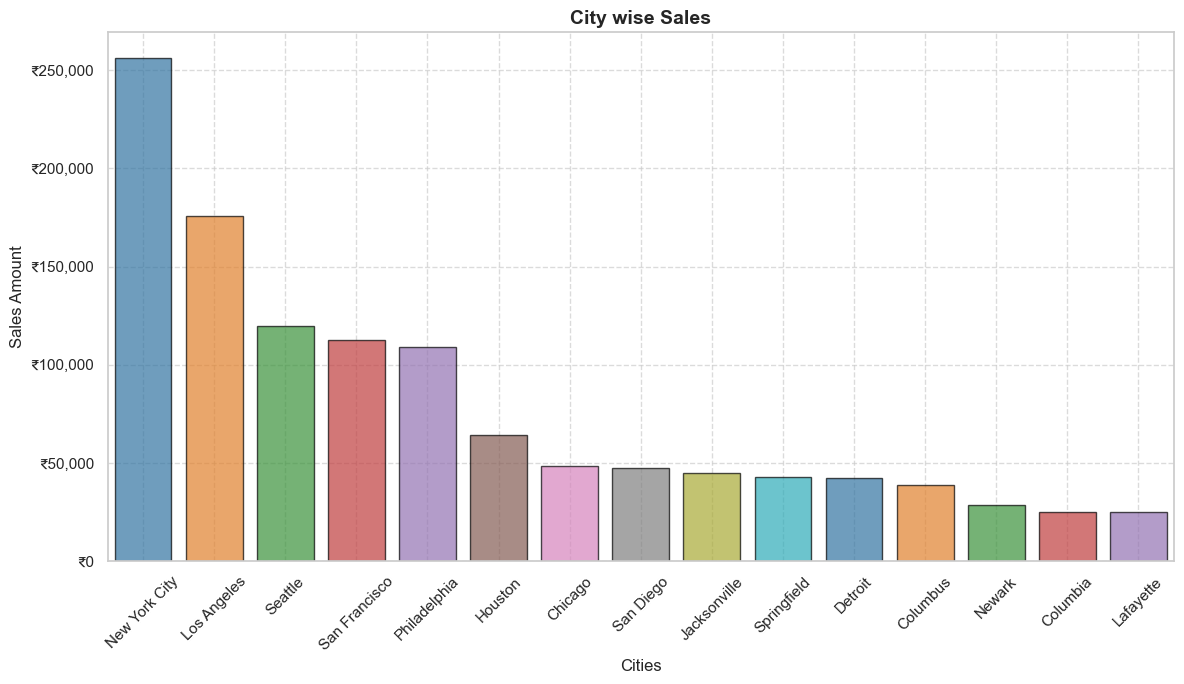

In [80]:
import matplotlib.ticker as mtick
cit=df.groupby('City')[['Sales','Profit']].sum().reset_index()
top_cit=cit.sort_values('Sales',ascending=False).head(15)

plt.figure(figsize=(12,7))
sns.barplot(x='City',y='Sales',data=top_cit,palette='tab10',hue='City',legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('City wise Sales',fontweight='bold',fontsize=14)
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Sales Amount',fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

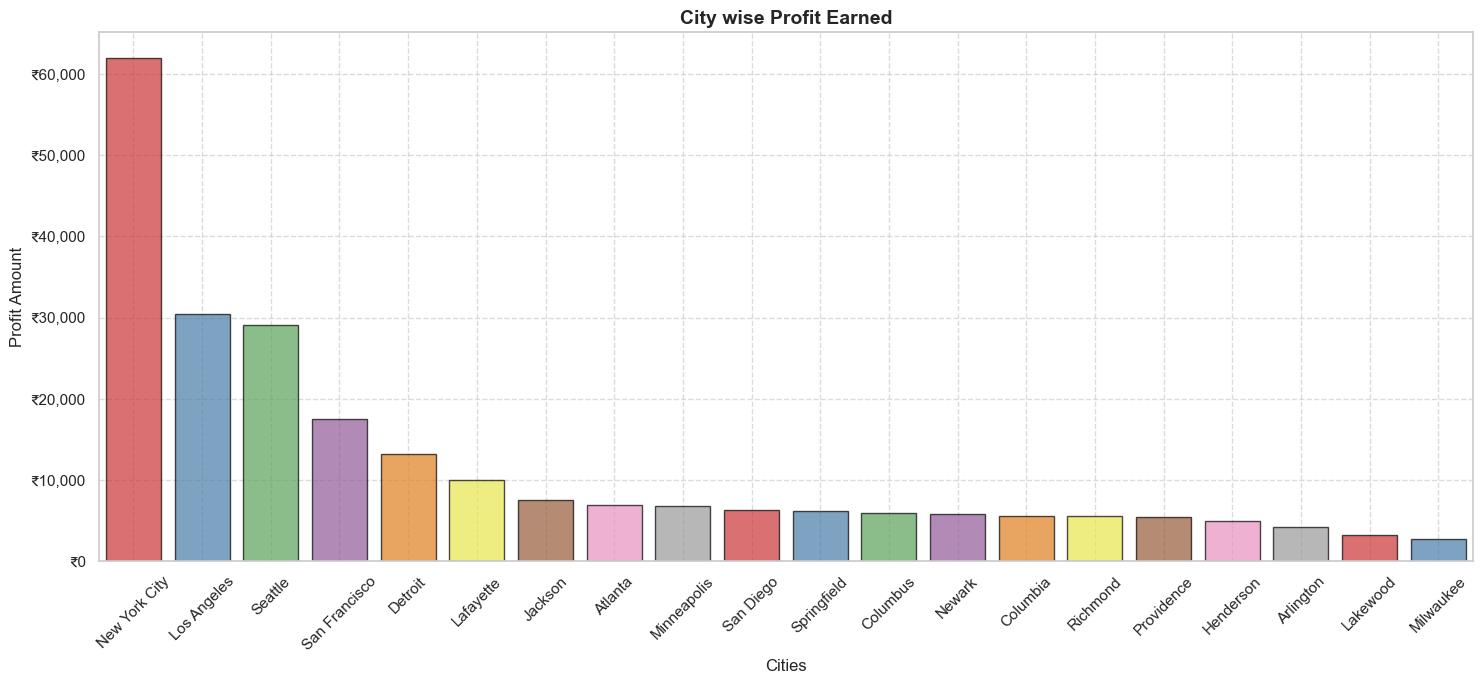

In [81]:
import matplotlib.ticker as mtick
cit=df.groupby('City')[['Sales','Profit']].sum().sort_values(by='Profit',ascending=False)
top_cit=cit.head(20)

plt.figure(figsize=(15,7))
sns.barplot(x='City',y='Profit',data=top_cit,palette='Set1',hue='City',legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('City wise Profit Earned',fontweight='bold',fontsize=14)
plt.xlabel('Cities',fontsize=12)
plt.ylabel('Profit Amount',fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

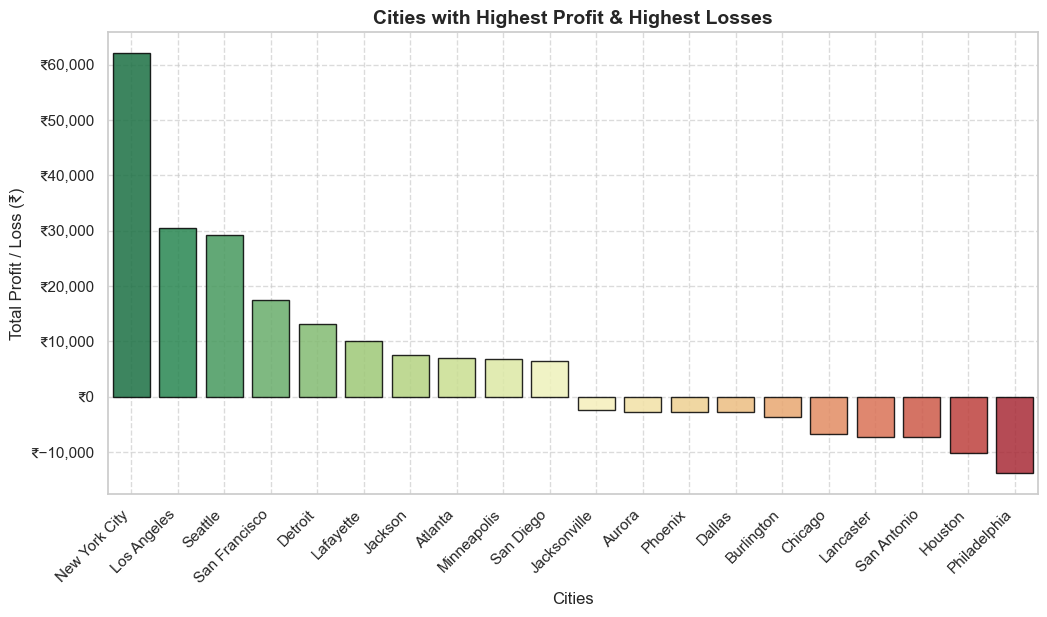

In [82]:
city_pro=df.groupby(['City'])['Profit'].sum().sort_values(ascending=False)
top10=city_pro.head(10)
bot10=city_pro.tail(10)
combined=pd.concat([top10,bot10]).sort_values(ascending=False)
plot_df=combined.reset_index(name='Profit')

plt.figure(figsize=(12,6))
sns.barplot(data=plot_df,x='City',y='Profit',hue='City',legend=False,palette='RdYlGn_r',edgecolor='black',alpha=0.85)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))

plt.title('Cities with Highest Profit & Highest Losses', fontweight='bold', fontsize=14)
plt.xlabel('Cities', fontsize=12)
plt.ylabel('Total Profit / Loss (₹)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(linestyle='--', alpha=0.7)

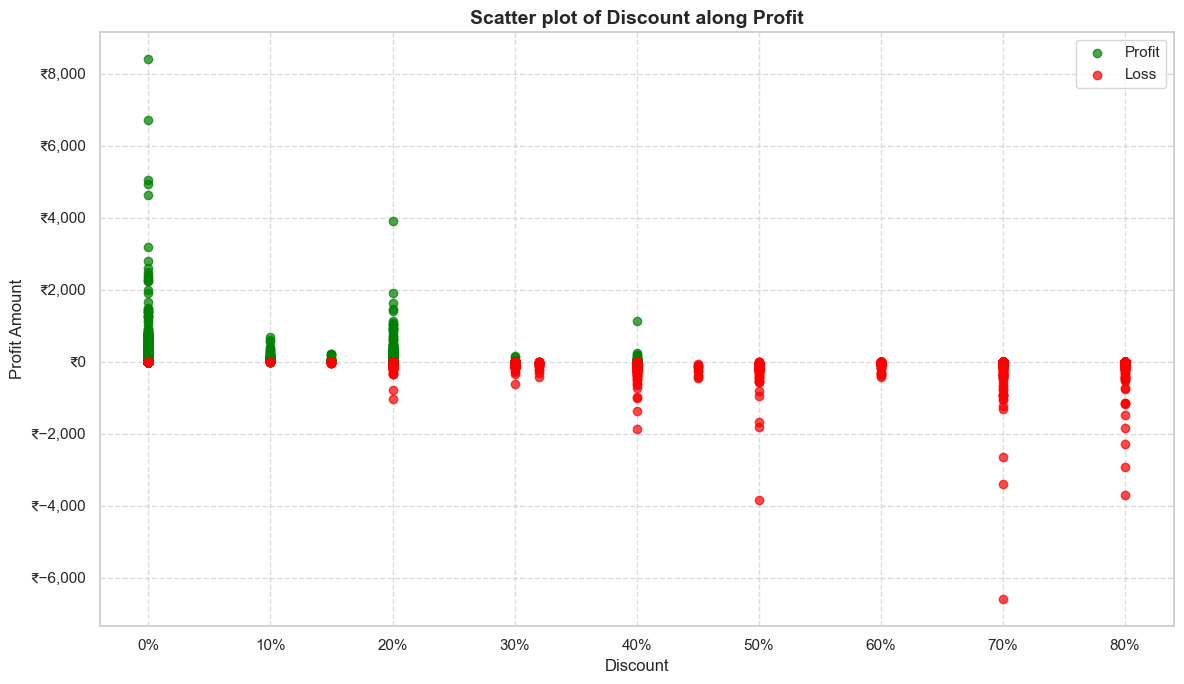

In [83]:
import matplotlib.ticker as mtick

plt.figure(figsize=(12,7))
plt.scatter(df[df['Profit'] > 0]['Discount'],df[df['Profit'] > 0]['Profit'],color='green',alpha=0.7,label='Profit')
plt.scatter(df[df['Profit'] <= 0]['Discount'],df[df['Profit'] <= 0]['Profit'],color='red',alpha=0.7,label='Loss')

plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))

plt.title('Scatter plot of Discount along Profit',fontweight='bold',fontsize=14)
plt.xlabel('Discount',fontsize=12)
plt.ylabel('Profit Amount',fontsize=12)
plt.legend(loc='best')
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

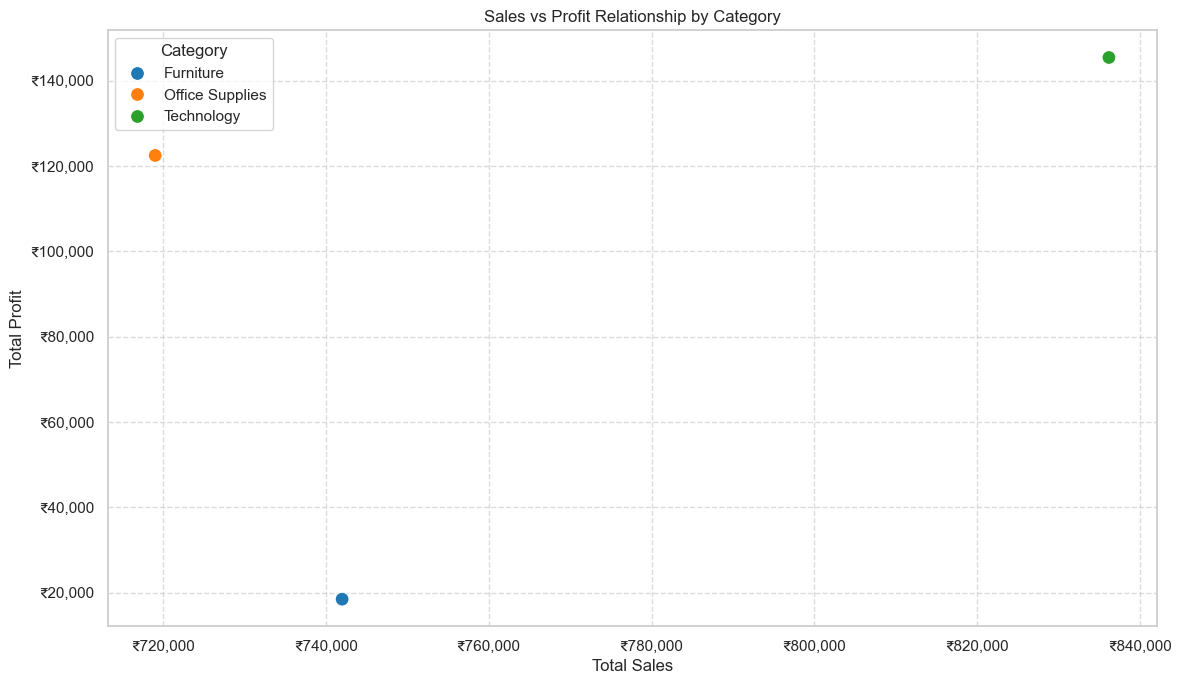

In [84]:
import matplotlib.ticker as mtick
cat_sp=df.groupby('Category')[['Sales','Profit']].sum().reset_index()

plt.figure(figsize=(12,7))
sns.scatterplot(data=cat_sp,x='Sales',y='Profit',hue='Category',s=100,palette='tab10')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales vs Profit Relationship by Category")
plt.xlabel("Total Sales")
plt.ylabel("Total Profit")
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()


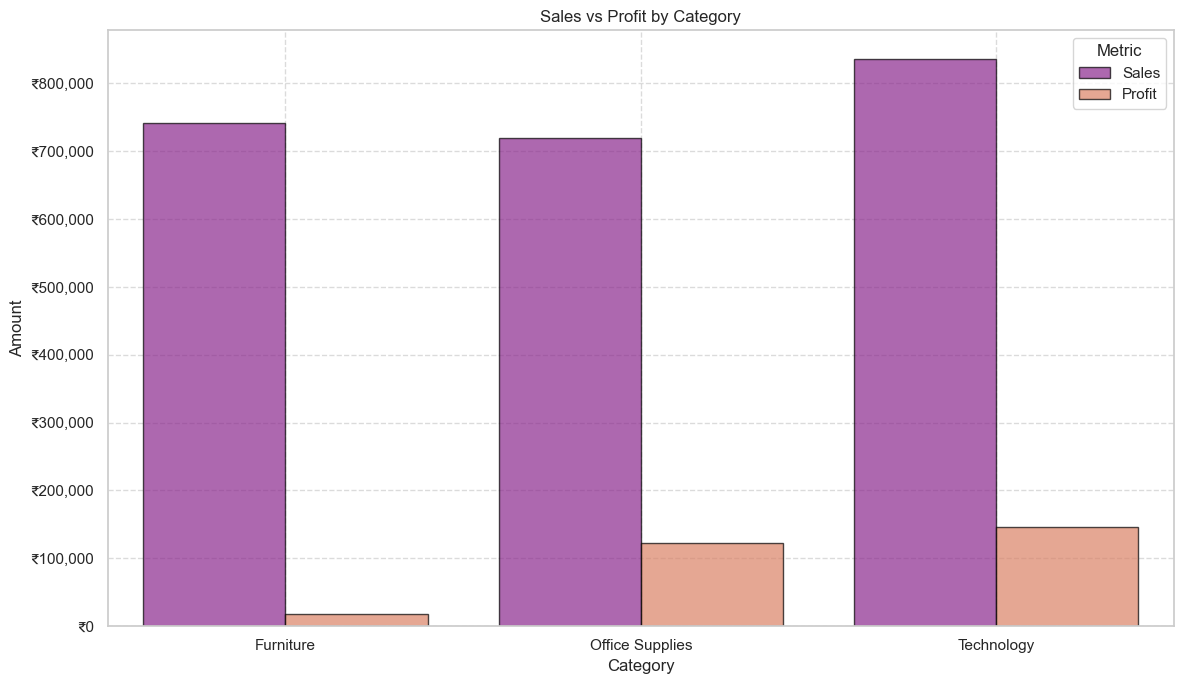

In [85]:
import matplotlib.ticker as mtick
cat_sp=df.groupby('Category')[['Sales','Profit']].sum().reset_index()

cat_sp_melted=cat_sp.melt(id_vars='Category',value_vars=['Sales','Profit'],value_name='Amount',var_name='Metric')

plt.figure(figsize=(12,7))
sns.barplot(data=cat_sp_melted,x='Category',y='Amount',hue='Metric',palette='plasma',edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales vs Profit by Category")
plt.xlabel("Category")
plt.ylabel("Amount")
plt.legend(title="Metric")
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

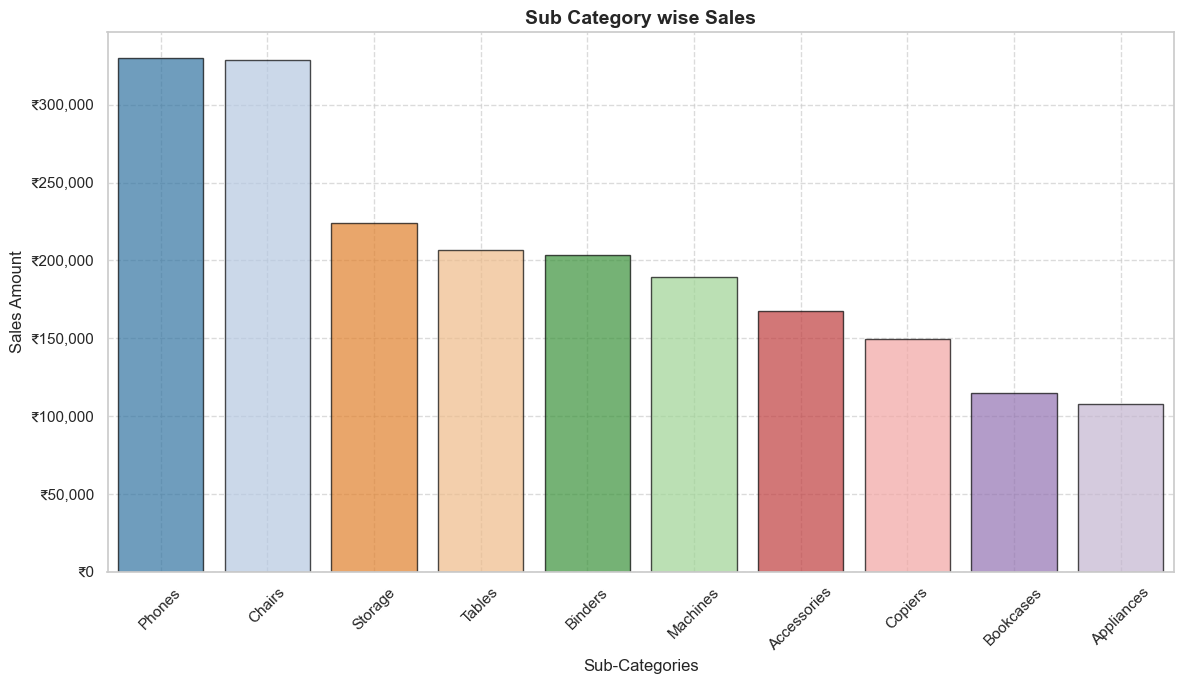

In [86]:
import matplotlib.ticker as mtick
sub=df.groupby(['Sub-Category'])['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data=sub,x='Sub-Category',y='Sales',palette='tab20',hue='Sub-Category',legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Sub Category wise Sales',fontweight='bold',fontsize=14)
plt.xlabel('Sub-Categories',fontsize=12)
plt.ylabel('Sales Amount',fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

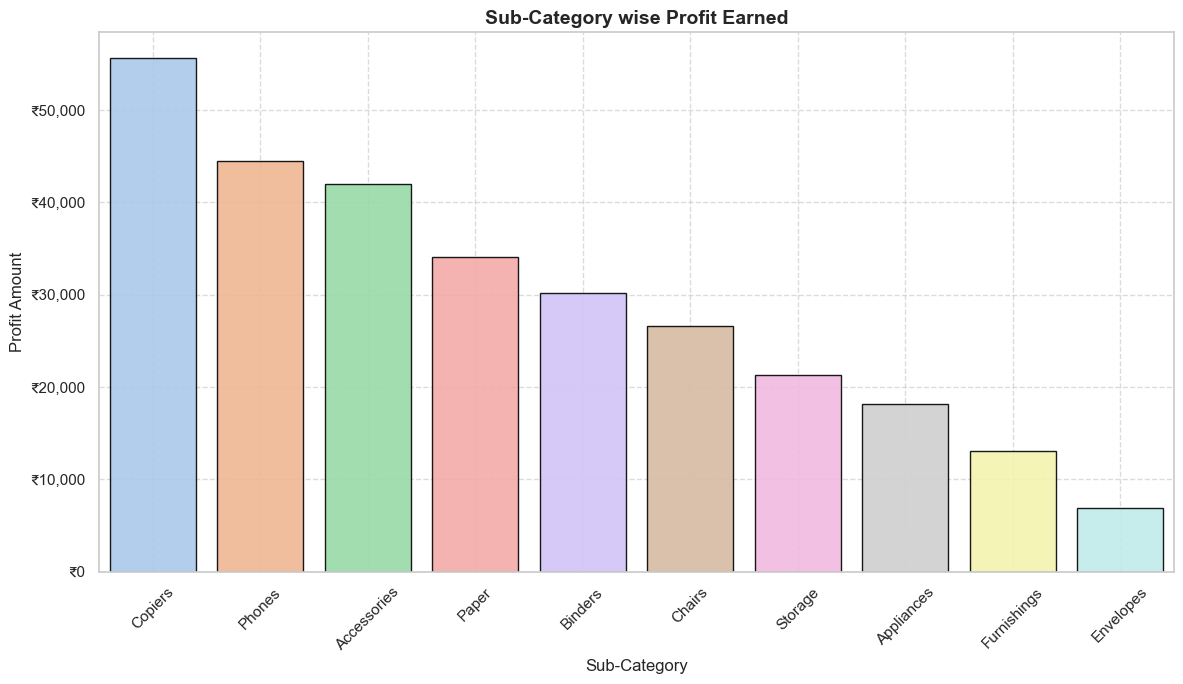

In [87]:
import matplotlib.ticker as mtick
sub=df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data=sub,x='Sub-Category',y='Profit',palette='pastel',hue='Sub-Category',legend=False,edgecolor='black',alpha=0.9)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Sub-Category wise Profit Earned',fontweight='bold',fontsize=14)
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Profit Amount',fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

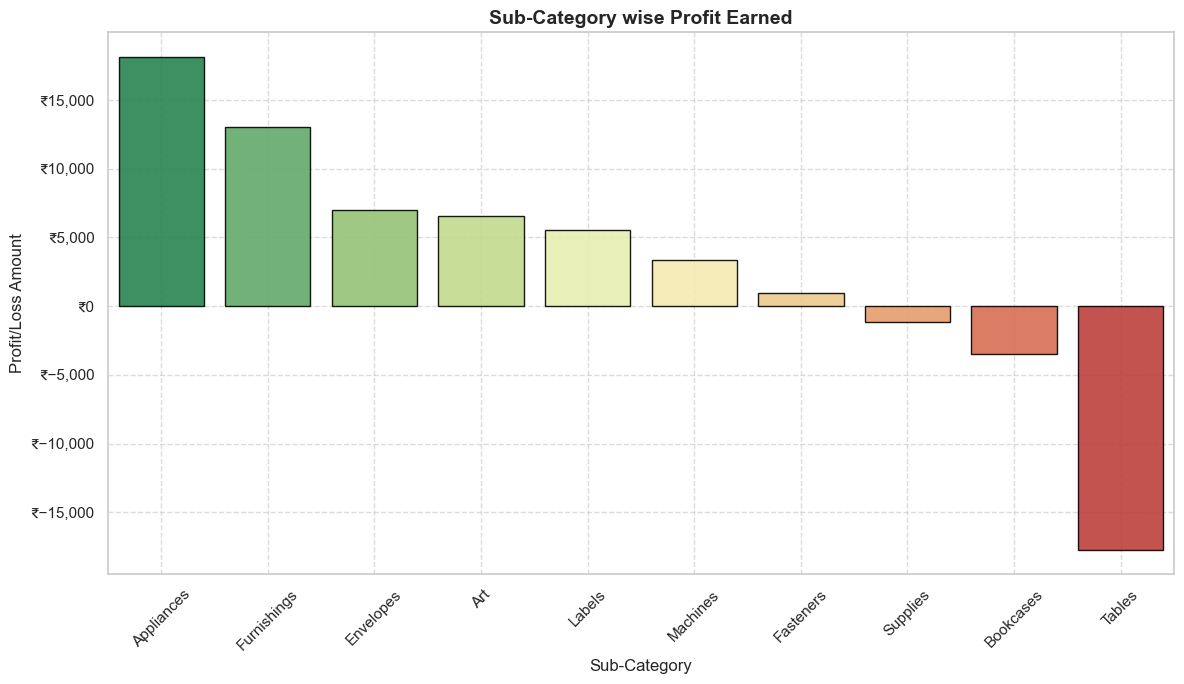

In [88]:
import matplotlib.ticker as mtick
sub=df.groupby(['Sub-Category'])['Profit'].sum().sort_values(ascending=False).tail(10).reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data=sub,x='Sub-Category',y='Profit',palette='RdYlGn_r',hue='Sub-Category',legend=False,edgecolor='black',alpha=0.9)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Sub-Category wise Profit Earned',fontweight='bold',fontsize=14)
plt.xlabel('Sub-Category',fontsize=12)
plt.ylabel('Profit/Loss Amount',fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

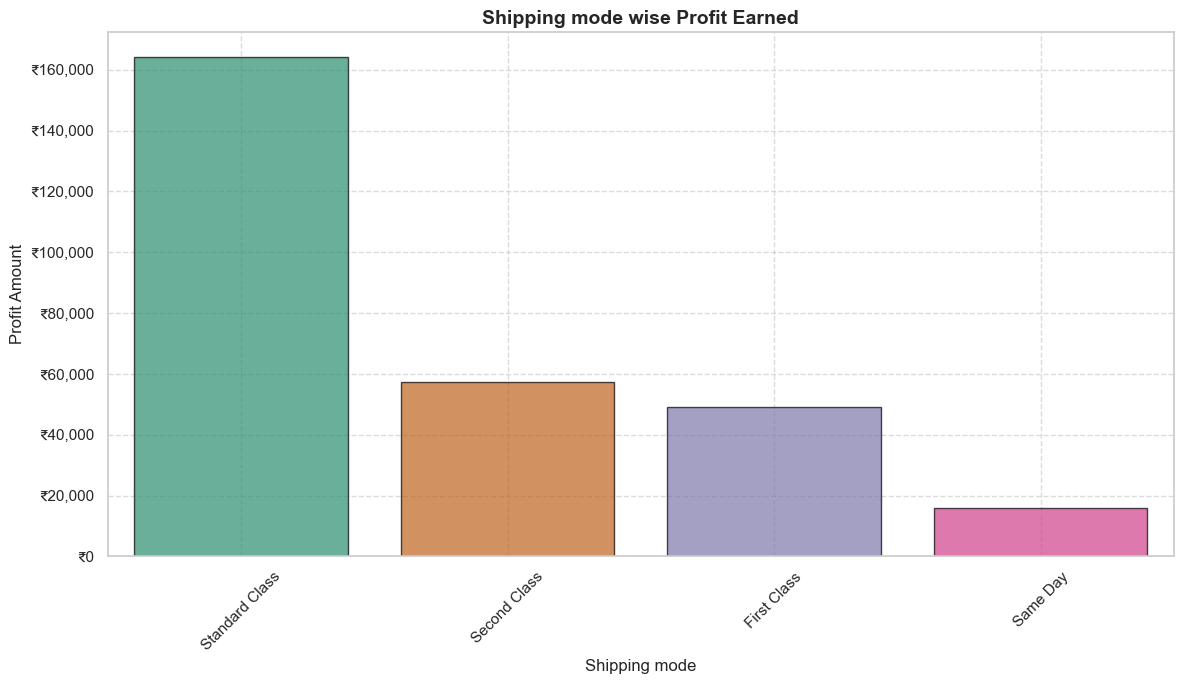

In [89]:
import matplotlib.ticker as mtick
sub=df.groupby(['Ship Mode'])['Profit'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(12,7))
sns.barplot(data=sub,x='Ship Mode',y='Profit',palette='Dark2',hue='Ship Mode',legend=False,edgecolor='black',alpha=0.7)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Shipping mode wise Profit Earned',fontweight='bold',fontsize=14)
plt.xlabel('Shipping mode',fontsize=12)
plt.ylabel('Profit Amount',fontsize=12)
plt.xticks(rotation=45)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

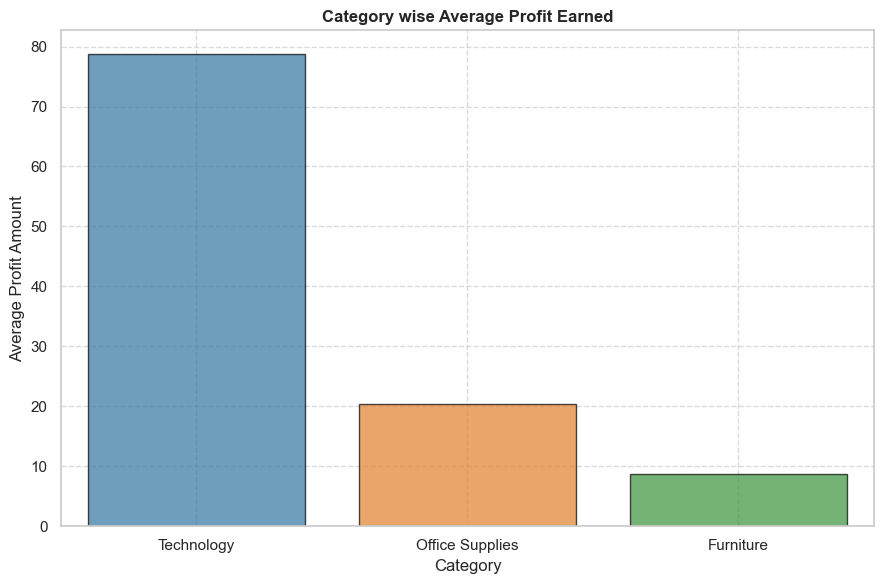

In [90]:
avg_pro=df.groupby(['Category'])['Profit'].mean().reset_index().sort_values(by='Profit',ascending=False)

plt.figure(figsize=(9,6))
sns.barplot(data=avg_pro,x='Category',y='Profit',palette='tab10',hue='Category',legend=False,edgecolor='black',alpha=0.7)

plt.title('Category wise Average Profit Earned',fontweight='bold')
plt.xlabel('Category',fontsize=12)
plt.ylabel('Average Profit Amount',fontsize=12)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

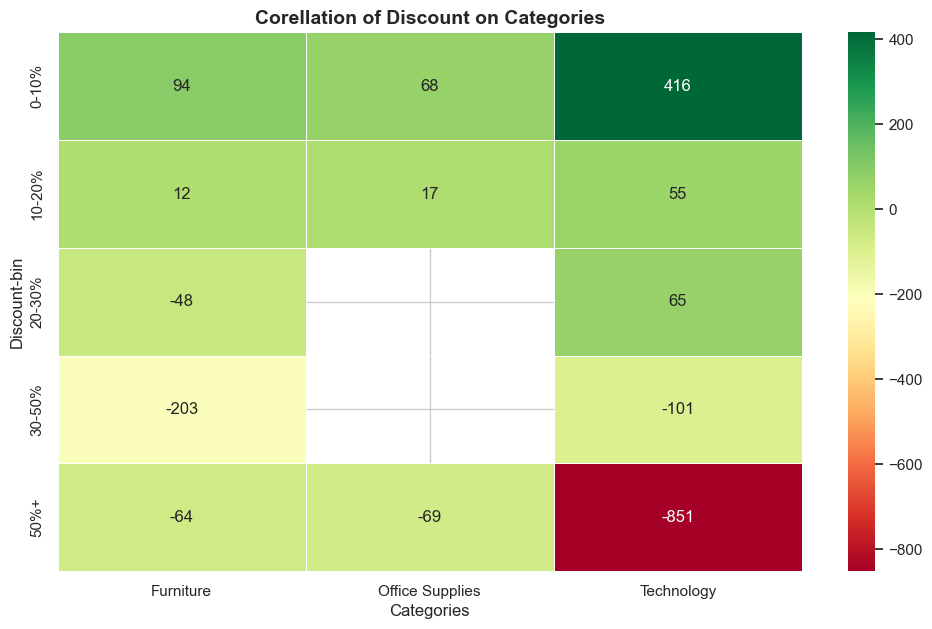

In [91]:
df['Discount_bin']=pd.cut(df['Discount'],bins=[0,0.1,0.2,0.3,0.5,1],labels=['0-10%','10-20%','20-30%','30-50%','50%+'])
dis=df.groupby(['Discount_bin','Category'],observed=False) ['Profit'].mean().unstack()

plt.figure(figsize=(12,7))
sns.heatmap(dis,annot=True,fmt='.0f',cmap='RdYlGn',linewidth=0.5)
plt.title('Corellation of Discount on Categories',fontweight='bold',fontsize=14)
plt.xlabel('Categories',fontsize=12)
plt.ylabel('Discount-bin',fontsize=12)
plt.show()

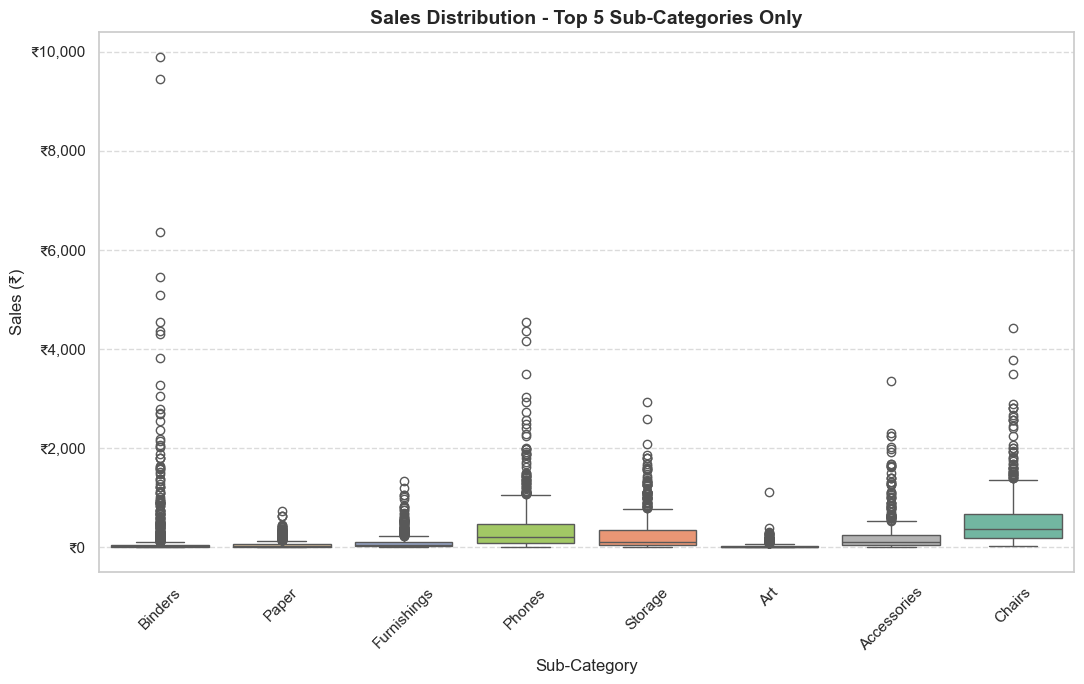

In [92]:
import matplotlib.ticker as mtick
top5=df['Sub-Category'].value_counts().head(8).index
filter=df[df['Sub-Category'].isin (top5)]

plt.figure(figsize=(11,7))
sns.boxplot(data=filter,x='Sub-Category',y='Sales',order=top5,hue='Sub-Category',palette='Set2',legend=False)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title('Sales Distribution - Top 5 Sub-Categories Only', fontsize=14, fontweight='bold')
plt.xlabel('Sub-Category', fontsize=12)
plt.ylabel('Sales (₹)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

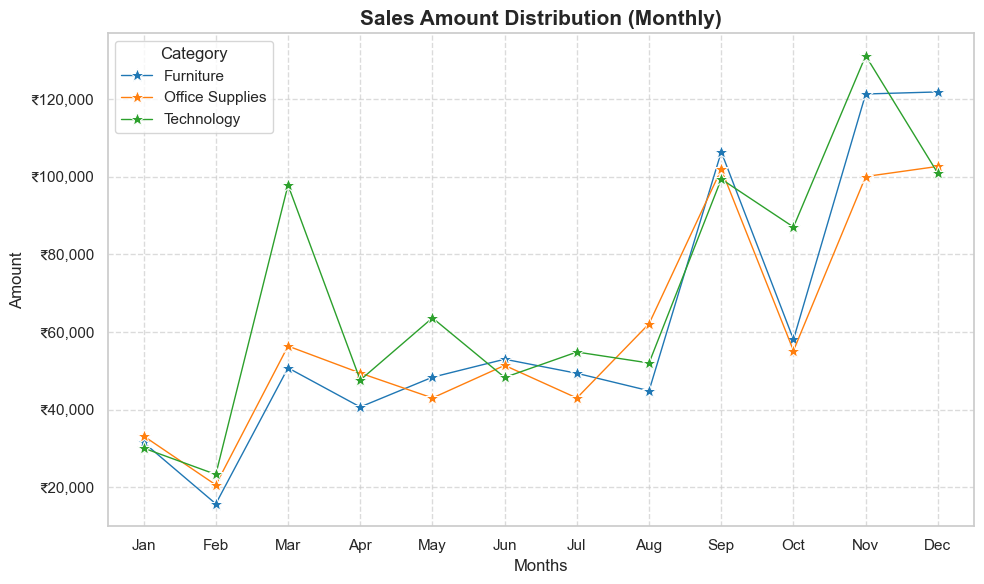

In [93]:
import matplotlib.ticker as mtick
sns.set_theme(style="whitegrid", palette="viridis")
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Month']=df['Order Date'].dt.month
mon_sales=df.groupby(['Month','Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=mon_sales,x='Month',y='Sales',hue='Category',palette='tab10',marker='*',markersize='10',linestyle='-',linewidth=1)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales Amount Distribution (Monthly)",fontsize=15,fontweight='bold')
plt.ylabel("Amount",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5, 12.5)          # nice padding
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

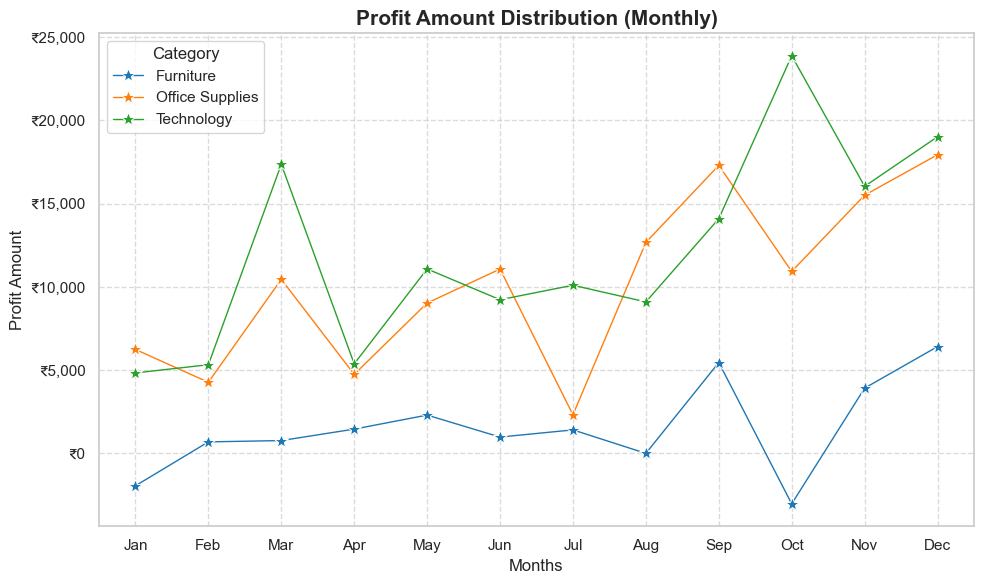

In [94]:
import matplotlib.ticker as mtick
sns.set_theme(style="whitegrid", palette="viridis")
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Month']=df['Order Date'].dt.month
mon_sales=df.groupby(['Month','Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=mon_sales,x='Month',y='Profit',hue='Category',palette='tab10',marker='*',markersize='10',linestyle='-',linewidth=1)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Profit Amount Distribution (Monthly)",fontsize=15,fontweight='bold')
plt.ylabel("Profit Amount",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5, 12.5)          # nice padding
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

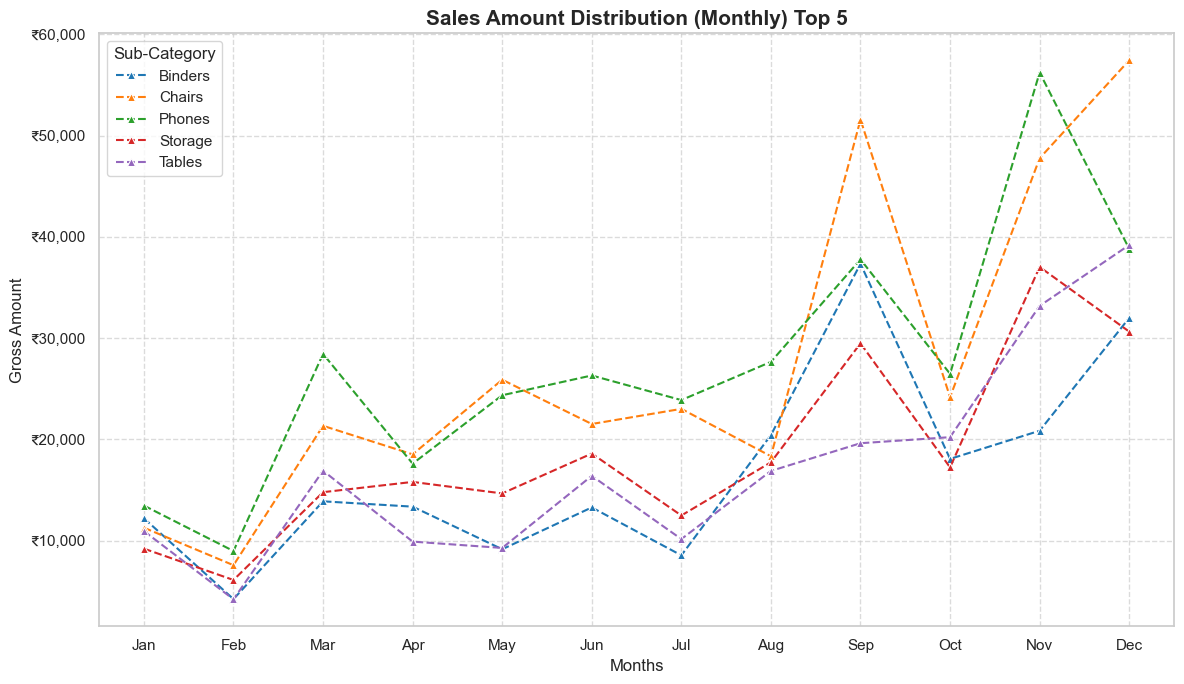

In [95]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Months']=df['Order Date'].dt.month

top5=df.groupby(['Sub-Category'])['Sales'].sum().nlargest(5).index
filter=df[df['Sub-Category'].isin(top5)]

mon_sales=filter.groupby(['Month','Sub-Category'])['Sales'].sum().reset_index()

plt.figure(figsize=(12,7))
sns.lineplot(data=mon_sales,hue='Sub-Category',y='Sales',x='Month',estimator='sum',palette='tab10',marker='^',linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales Amount Distribution (Monthly) Top 5",fontsize=15,fontweight='bold')
plt.ylabel("Gross Amount",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5, 12.5)          # nice padding
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

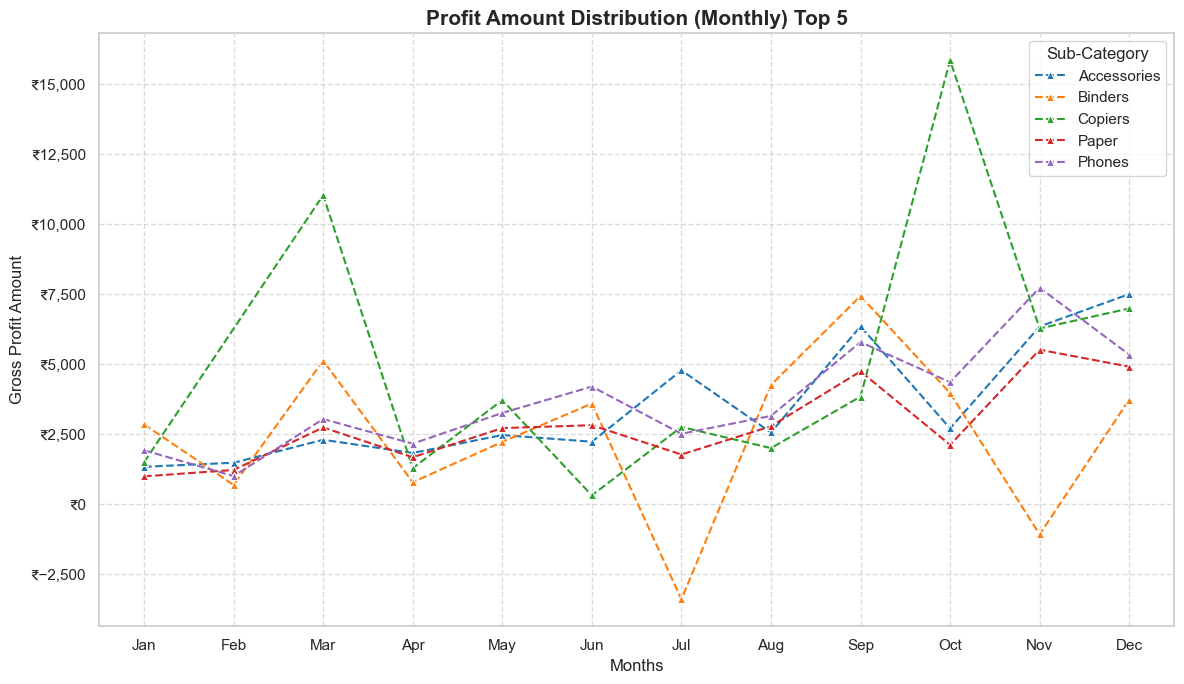

In [96]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Months']=df['Order Date'].dt.month

top5=df.groupby(['Sub-Category'])['Profit'].sum().nlargest(5).index
filter=df[df['Sub-Category'].isin(top5)]

mon_sales=filter.groupby(['Month','Sub-Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(12,7))
sns.lineplot(data=mon_sales,hue='Sub-Category',y='Profit',x='Month',estimator='sum',palette='tab10',marker='^',linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Profit Amount Distribution (Monthly) Top 5",fontsize=15,fontweight='bold')
plt.ylabel("Gross Profit Amount",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5, 12.5)          # nice padding
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.plot

<function matplotlib.pyplot.plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'>

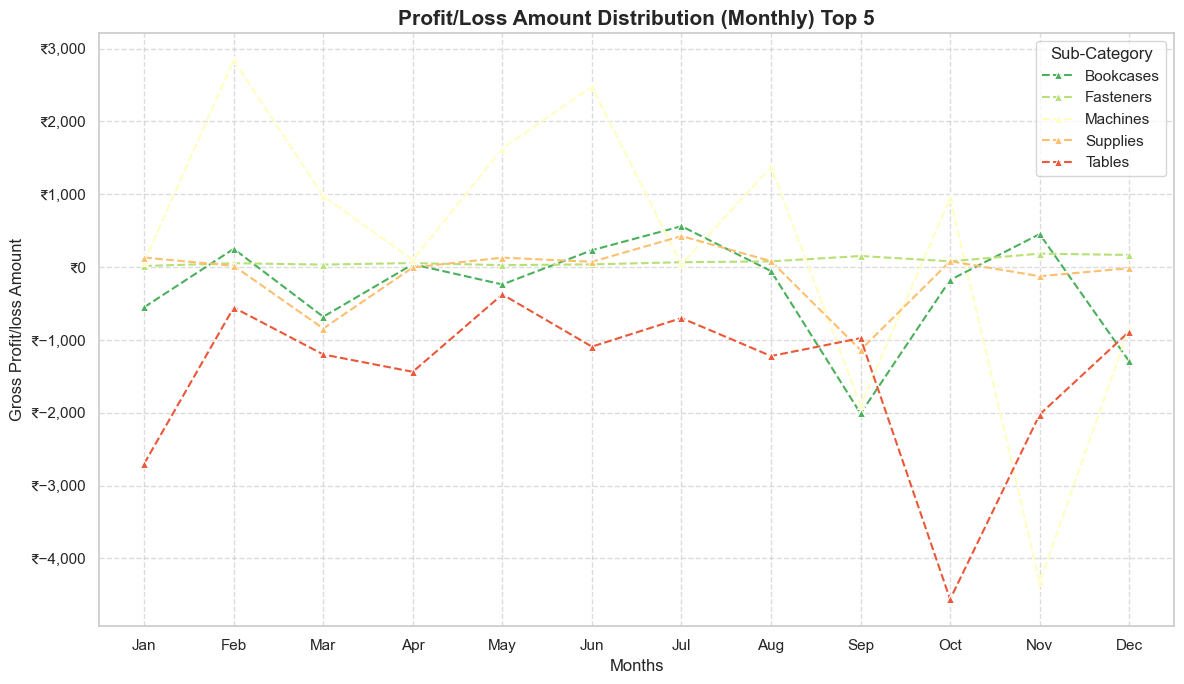

In [97]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Months']=df['Order Date'].dt.month

bot5=df.groupby(['Sub-Category'])['Profit'].sum().nsmallest(5).index
filter=df[df['Sub-Category'].isin(bot5)]

mon_sales=filter.groupby(['Month','Sub-Category'])['Profit'].sum().reset_index()

plt.figure(figsize=(12,7))
sns.lineplot(data=mon_sales,hue='Sub-Category',y='Profit',x='Month',estimator='sum',palette='RdYlGn_r',marker='^',linestyle='--')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Profit/Loss Amount Distribution (Monthly) Top 5",fontsize=15,fontweight='bold')
plt.ylabel("Gross Profit/loss Amount",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5, 12.5)          # nice padding
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.plot

In [98]:
# 1. Total sales per month (should match stacked bar height)
print("Total sales per month:")
print(df.groupby('Month')['Sales'].sum().sort_index())

# 2. Sum per category per month (should add up to the above)
print("\nSales by category & month:")
print(df.groupby(['Month', 'Category'])['Sales'].sum().unstack().fillna(0))

# 3. If your lineplot is using default mean — check this
print("\nAverage sales per month per category (what lineplot probably shows):")
print(df.groupby(['Month', 'Category'])['Sales'].mean().unstack().fillna(0))

Total sales per month:
Month
1      94924.8356
2      59751.2514
3     205005.4888
4     137762.1286
5     155028.8117
6     152718.6793
7     147238.0970
8     159044.0630
9     307649.9457
10    200322.9847
11    352461.0710
12    325293.5035
Name: Sales, dtype: float64

Sales by category & month:
Category    Furniture  Office Supplies  Technology
Month                                             
1          31569.2416        33233.831   30121.763
2          15765.9204        20641.913   23343.418
3          50768.2758        56385.643   97851.570
4          40698.5836        49433.270   47630.275
5          48365.1307        43021.526   63642.155
6          52999.4633        51414.633   48304.583
7          49377.0120        43007.059   54854.026
8          44884.0450        62134.162   52025.856
9         106380.5907       101888.646   99380.709
10         58087.5157        55203.524   87031.945
11        121286.0490       100040.181  131134.841
12        121817.9675       102642.6

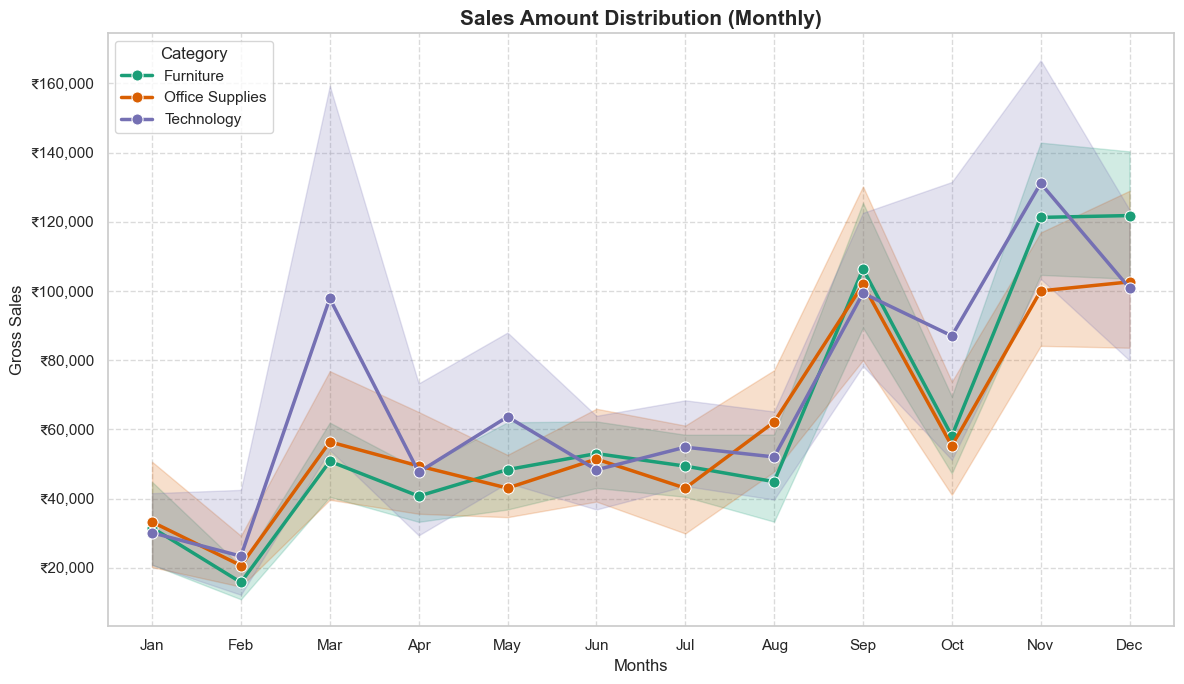

In [99]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Month']=df['Order Date'].dt.month
top5=df.groupby(['Category']) ['Sales'].sum().sort_values(ascending=False).head(5).index
filter=df[df['Category'].isin(top5)]

plt.figure(figsize=(12,7))
sns.lineplot(data=filter,hue='Category',x='Month',y='Sales',estimator='sum',
    #errorbar=None,
    palette='Dark2',
    marker='o',
    linewidth=2.5,
    markersize=8)
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales Amount Distribution (Monthly)",fontsize=15,fontweight='bold')
plt.ylabel("Gross Sales",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5,12.5)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

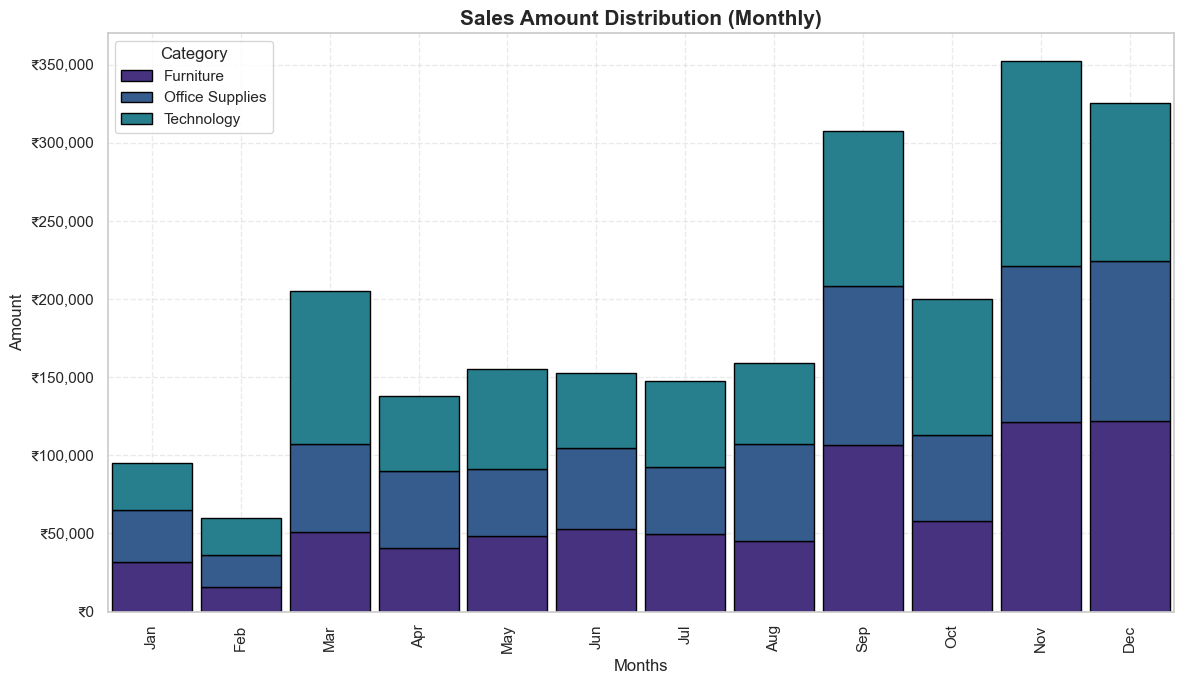

In [100]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Month']=df['Order Date'].dt.month

pivot=pd.pivot_table(data=df,index='Month',columns='Category',values='Sales',aggfunc='sum',fill_value=0)

pivot.plot(kind='bar',stacked=True,figsize=(12,7),linewidth=1,width=0.9,edgecolor='black')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales Amount Distribution (Monthly)",fontsize=15,fontweight='bold')
plt.ylabel("Amount",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(-0.5,11.5)
plt.grid(linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

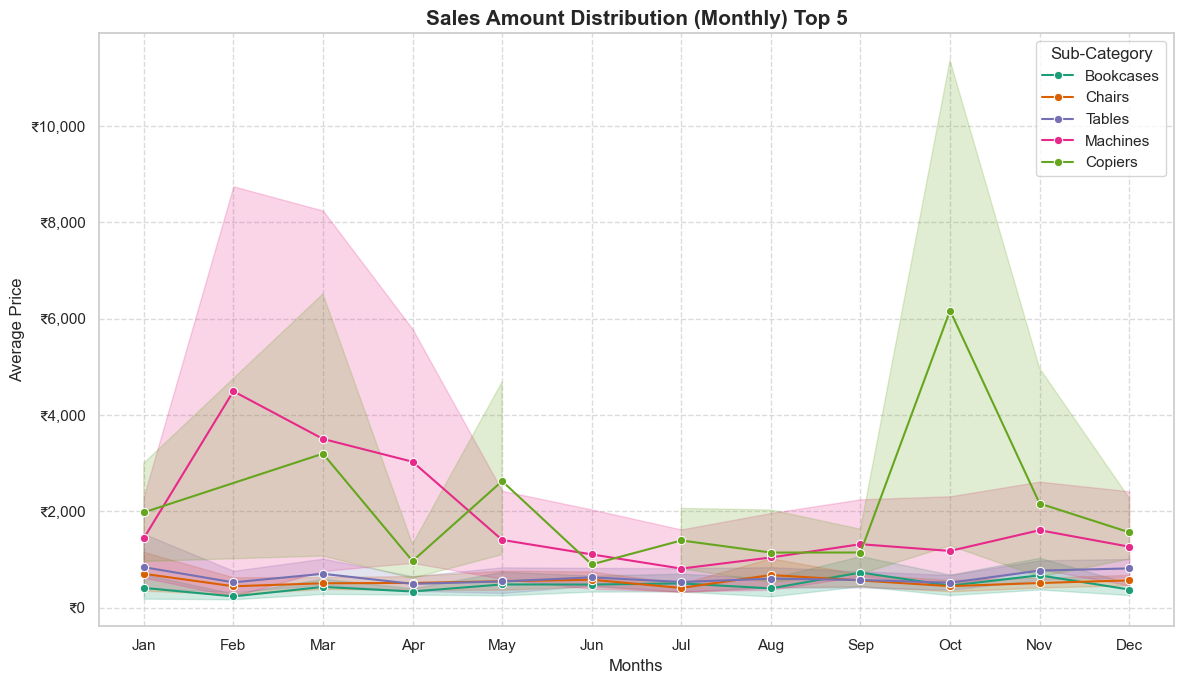

In [101]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Month']=df['Order Date'].dt.month
top5=df.groupby(['Sub-Category']) ['Sales'].mean().nlargest(5).index
filter=df[df['Sub-Category'].isin (top5)]

plt.figure(figsize=(12,7))
sns.lineplot(data=filter,hue='Sub-Category',x='Month',y='Sales',palette='Dark2',estimator='mean',marker='o')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))
plt.title("Sales Amount Distribution (Monthly) Top 5",fontsize=15,fontweight='bold')
plt.ylabel("Average Price",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(1,13),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(0.5,12.5)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()


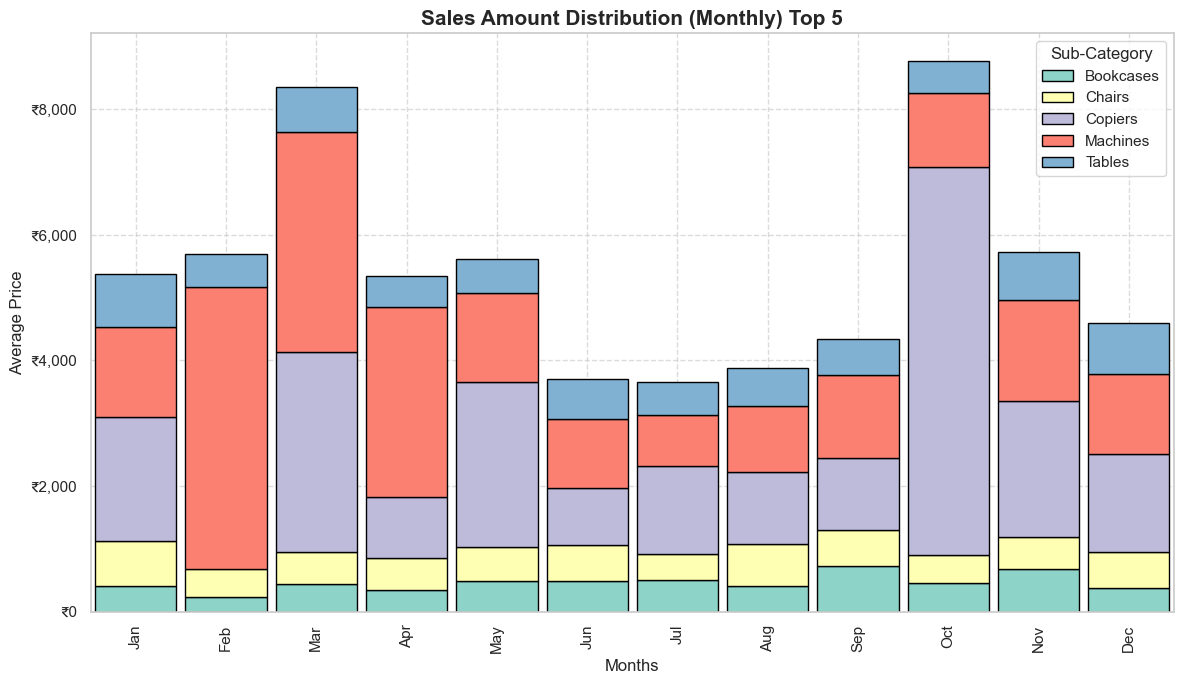

In [102]:
import matplotlib.ticker as mtick
df['Order Date']=pd.to_datetime(df['Order Date'],errors='coerce')
df['Month']=df['Order Date'].dt.month

top5=df.groupby(['Sub-Category']) ['Sales'].mean().nlargest(5).index
filter=df[df['Sub-Category'].isin (top5)]

pivot=pd.pivot_table(data=filter,index='Month',columns='Sub-Category',values='Sales',aggfunc='mean')

pivot.plot(kind='bar',stacked=True,figsize=(12,7),linewidth=1,width=0.9,color=plt.cm.Set3(range(5)),edgecolor='black')
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('₹{x:,.0f}'))

plt.title("Sales Amount Distribution (Monthly) Top 5",fontsize=15,fontweight='bold')
plt.ylabel("Average Price",fontsize=12)
plt.xlabel("Months",fontsize=12)
plt.xticks(range(0,12),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=11)
plt.xlim(-0.5,11.5)
plt.grid(linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

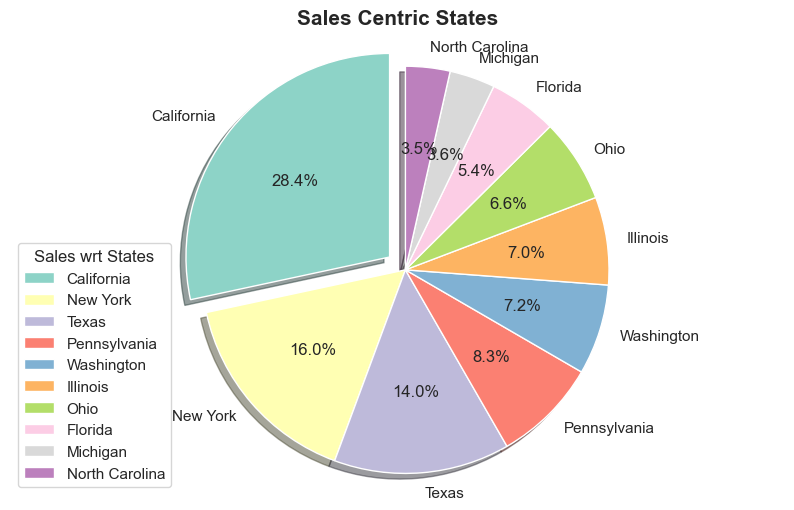

In [103]:
ship=df['State'].value_counts().head(10)
plt.figure(figsize=(10,6))
plt.pie(ship.values,labels=ship.index,explode=(0.1,0,0,0,0,0,0,0,0,0),autopct='%1.1f%%',startangle=90,shadow=True,colors=plt.cm.Set3(range(10)))
plt.legend(ship.index,title=('Sales wrt States'),loc='best')
plt.axis('equal')
plt.title('Sales Centric States',fontsize=15,fontweight='bold')
plt.show()

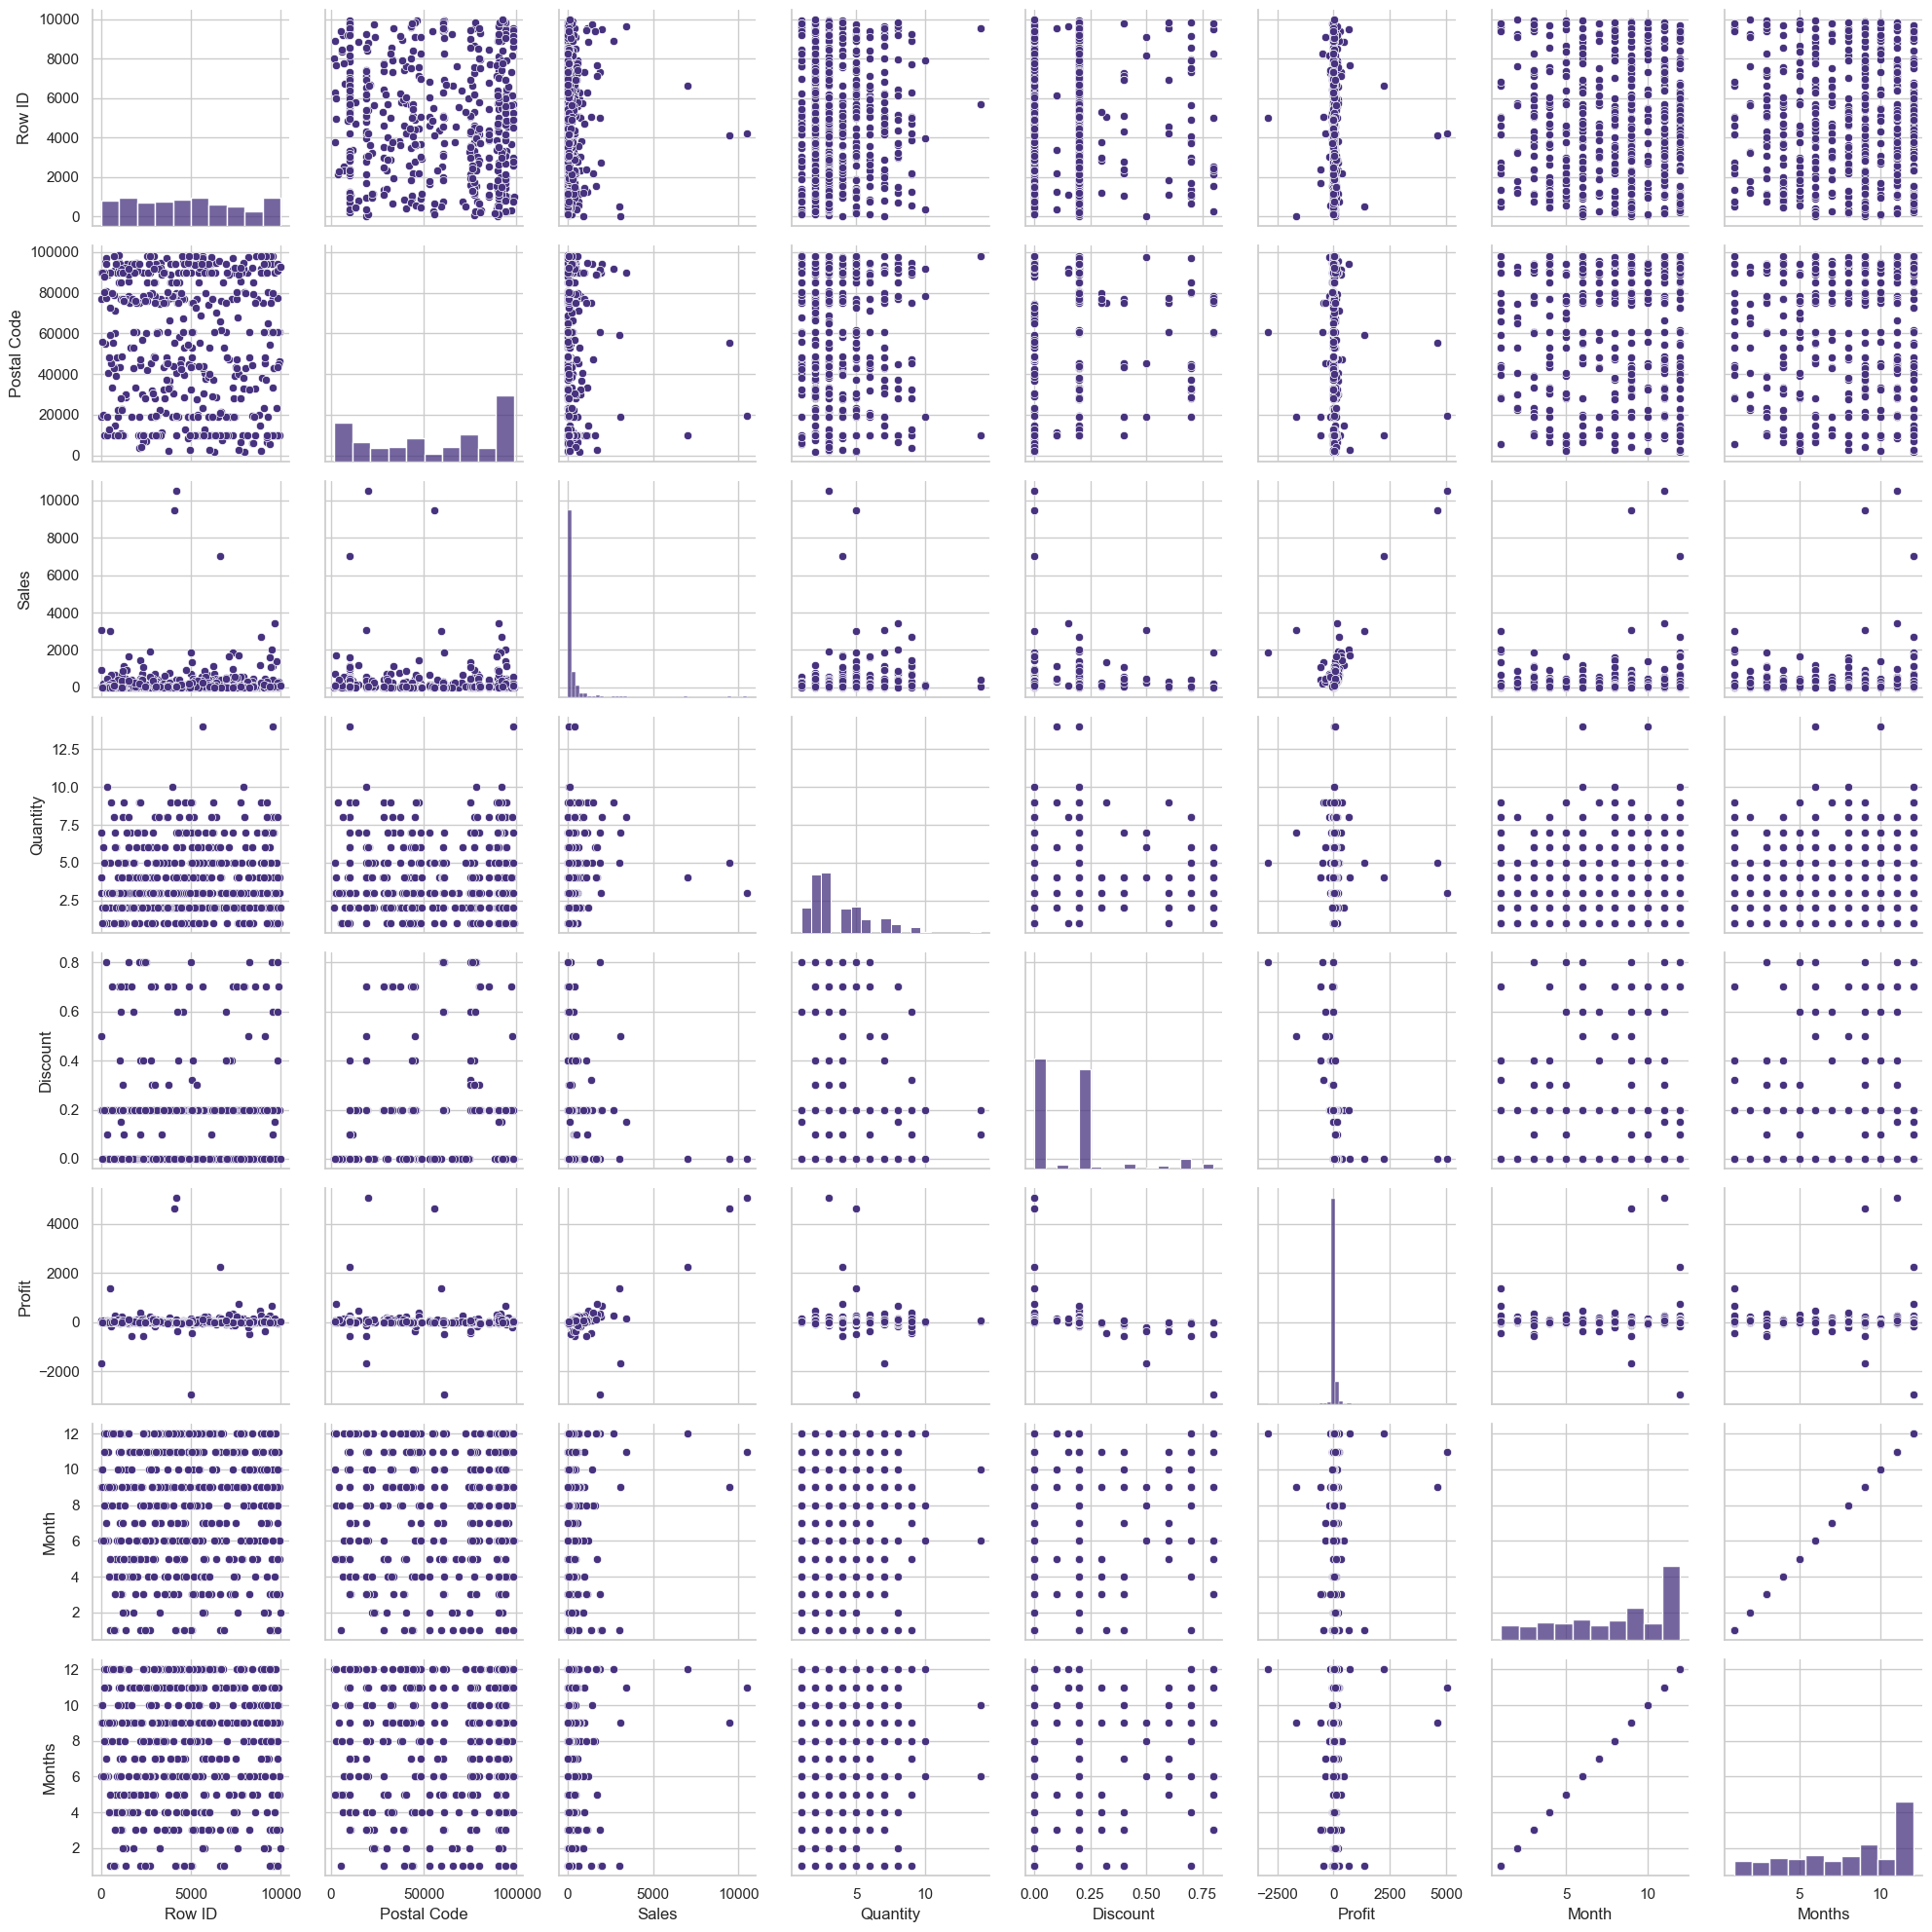

In [104]:
num=df.select_dtypes(include='number')
sns.pairplot(num.sample(500))
plt.grid(linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()

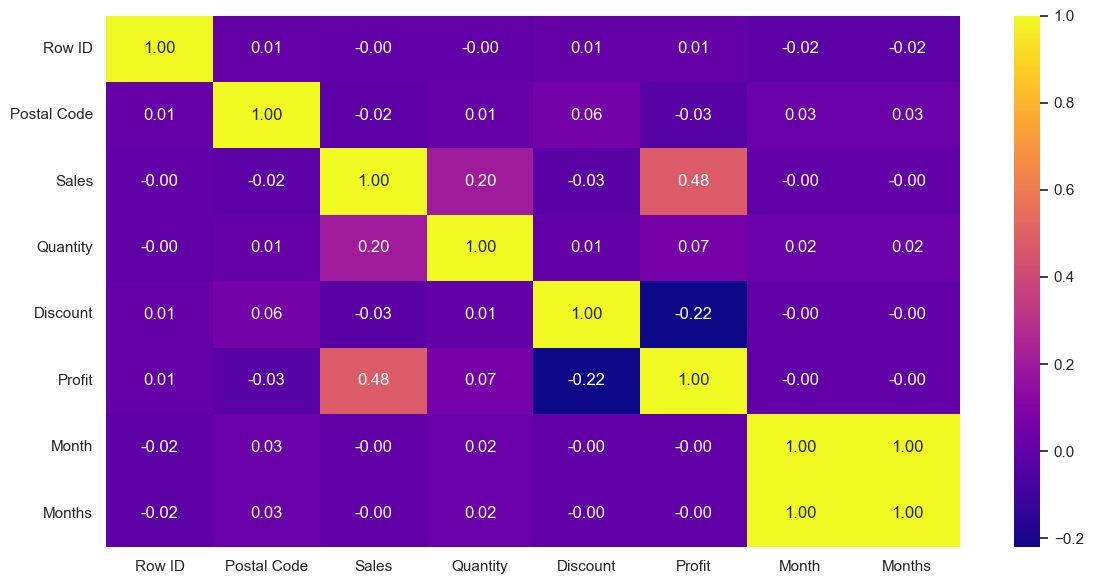

In [105]:
df.drop(columns=['Months'],errors='ignore')
num=df.select_dtypes(include='number')
plt.figure(figsize=(12,6))
sns.heatmap(num.corr(),annot=True,fmt='.2f',cmap='plasma')
plt.tight_layout()
plt.show()

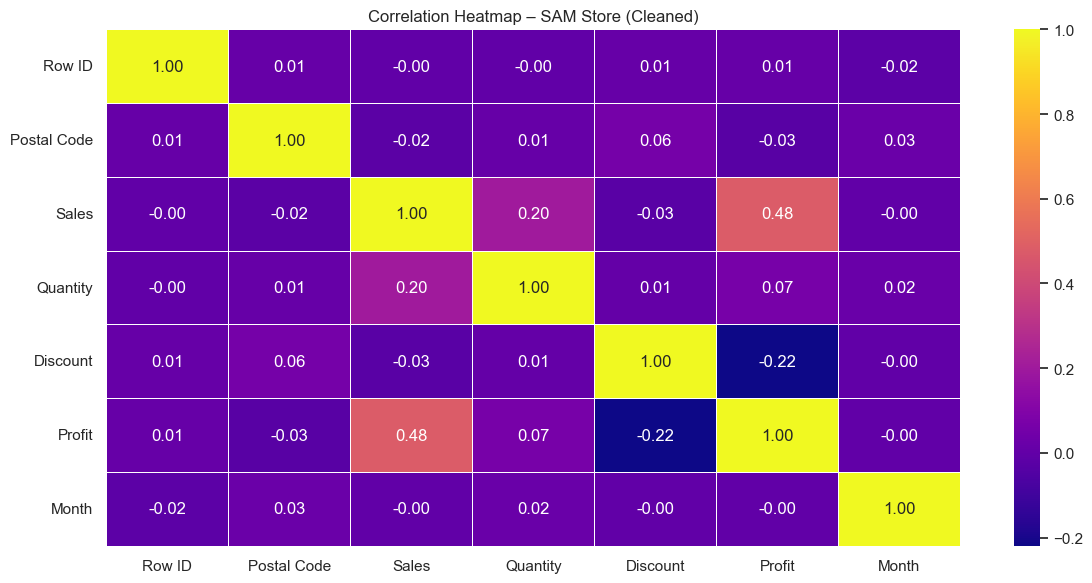

In [106]:
df = df.drop(columns=['Months'], errors='ignore')   

num = df.select_dtypes(include='number')

plt.figure(figsize=(12, 6))
sns.heatmap(num.corr(), annot=True, cmap='plasma', fmt='.2f', linewidths=0.5)  #.2f mandatory
plt.title('Correlation Heatmap – SAM Store (Cleaned)')
plt.tight_layout()
plt.show()

In [107]:
print(df['Segment'].value_counts())

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64


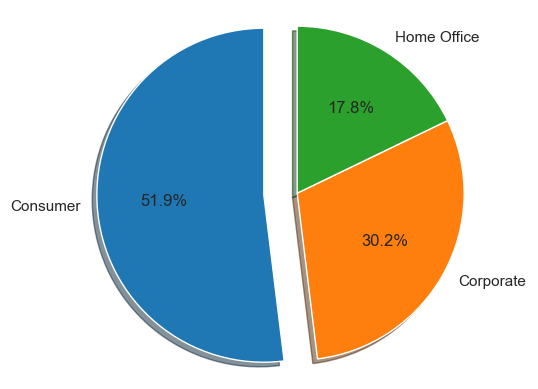

In [108]:
seg=df['Segment'].value_counts()
plt.pie(seg.values,labels=seg.index,explode=(0.2,0,0),autopct='%1.1f%%',startangle=90,shadow=True,colors=plt.cm.tab10(range(3)))
plt.axis('equal')
plt.show()
        

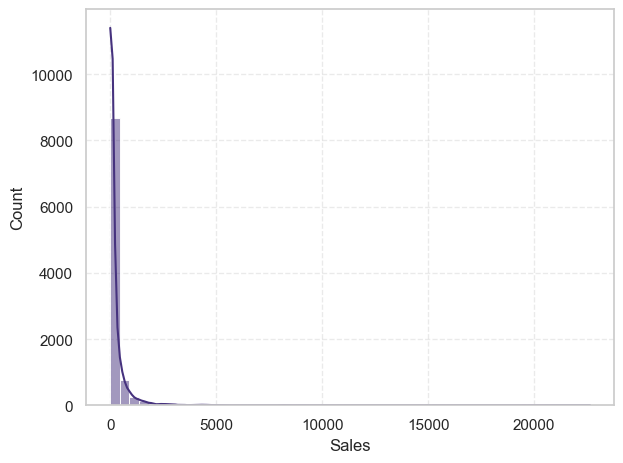

In [109]:
sns.histplot(data=df['Sales'],bins=50,kde=True)
plt.grid(linestyle='--',alpha=0.4)
plt.tight_layout()
plt.show()